# **Installing modules**

In [ ]:
!pip uninstall torch torchvision -y
!pip install torch torchvision --index-url https://download.pytorch.org/whl/cu121


Found existing installation: torch 2.5.1+cu121
Uninstalling torch-2.5.1+cu121:
  Successfully uninstalled torch-2.5.1+cu121
Found existing installation: torchvision 0.20.1+cu121
Uninstalling torchvision-0.20.1+cu121:
  Successfully uninstalled torchvision-0.20.1+cu121
Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.4/780.4 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 79.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 58.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 105.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
!pip install torch torchvision --index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://download.pytorch.org/whl/cpu


# Advantages of Transfer Learning

- **Improve Baseline Performance:** When we augment the knowledge of an isolated learner with knowledge from a pretrained model, the baseline performance might improve due to this knkowledge transfer.

- **Improved final performance:** Higher final perfomance might be attained by leveraging transfer learning.


- **Model-development time:** Utilizing knowledge from a pretrained model helps in fully learning the target task, as compared to a target model that learns from scratch. This, in turn, results in improvements in the overall time taken to develop/learn a model.


**Transfer Learning Types**:


- **Fine-tuning** the Pre-trained Model


- Pre-trained Model as **Fixed Feature Extractor**

**Fine-tuning the Pre-trained Model:** In fine-tuning, replace the final fully connected layer for classification of pre-trained model. Not only reset the final layer but also fine-tune the weights of the pretrained network by continuing the backpropagation.It is possible to fine-tune all the layers of the pre-trained model, or it's possible to keep some of the earlier layers fixed due to overfitting concerns and only fine-tune some higher-level portion of the network.

**Pre-trained Model as Fixed Feature Extractor:** The last fully connected layer is replaced with a new one with random weights and only this layer is trained. Here, we will freeze the weights for all of the network except that of the final fully connected layer. So, remove the last fully-connected layer, then treat the rest of the network as a fixed feature extractor for the new dataset.

When training machine learning models, the data is typically split into three sets:

    Training Set:
        Used to train the model by adjusting its weights and biases.
        The model learns patterns from this data.

    Cross-Validation Set:
        Used to evaluate the model's performance during training and choose the best model or architecture.
        Helps tune hyperparameters (e.g., number of layers, units, learning rate) and select the model with the best performance.
        It acts as a "proxy" for the unseen test set.

    Test Set:
        Used only after selecting the best model to estimate its generalization performance.
        This is the final evaluation and should not influence model selection or training.



Purpose of Cross-Validation:

    During model selection, you need to compare the performance of different architectures (or hyperparameter combinations). The cross-validation set provides an unbiased estimate of a model’s performance while preventing overfitting to the training set.
    You calculate the performance metric (e.g., accuracy, loss) on the cross-validation set for each model and choose the model with the best metric.

Avoid Using the Test Set:

    Using the test set for model selection would lead to data leakage, as the test set is meant to evaluate the model's performance only after the selection process is complete.

The Training Set:

    The training set is only used to train the models, not to evaluate or compare their performance. Evaluating on the training set would give an overly optimistic result since the model has already seen this data.

All the Data Combined:

    Combining all data (training, cross-validation, test) removes the purpose of splitting, leading to overfitting and unreliable performance metrics.

The Test Set:

    The test set is reserved for final evaluation after model selection to estimate how well the chosen model generalizes to unseen data. Using it for model selection would bias the evaluation.

Diagnostic in Machine Learning?

    In the context of machine learning, a diagnostic is a tool or test used to analyze and debug the behavior of a learning algorithm.
    The goal is to figure out:
        What aspects of the model are working well?
        What aspects need improvement?

Diagnostics help identify bottlenecks or weak spots in the system, such as:

    Whether the model is underfitting or overfitting.
    If the problem lies in the data, the model architecture, or the optimization process.

# Set Up Kaggle API Connection and Fetch Data


Downloading my Kaggle API

In [ ]:
# This code is solely to Down load my Kaggle.json API key stored on my Google Drive
# Install gdown if not already installed
!pip install gdown

# Define the file ID and download URL
file_id = "1fH7oDV8mCH4jUkjAd9_gcvWyb3LFX56A"
download_url = f"https://drive.google.com/uc?id={file_id}"

# Download the file
import gdown
gdown.download(download_url, output="kaggle.json", quiet=False)

print("File downloaded successfully!")

Downloading...
From: https://drive.google.com/uc?id=1fH7oDV8mCH4jUkjAd9_gcvWyb3LFX56A
To: /content/kaggle.json
100%|██████████| 65.0/65.0 [00:00<00:00, 226kB/s]

File downloaded successfully!


In [ ]:
# Install the Kaggle API
# The Kaggle API is used to fetch datasets directly from Kaggle.
!pip install kaggle --upgrade

In [ ]:
import os  # Provides functions to interact with the operating system, such as file and directory manipulation.
import shutil  # Used for high-level file operations like copying, moving, and removing files or directories.
import numpy as np  # A library for numerical computations, especially working with arrays and matrices.
from PIL import Image  # Used for opening, manipulating, and saving image files.
from torch.utils.data import Dataset, DataLoader, random_split  # Utilities from PyTorch for handling datasets, loading them, and splitting into subsets.
import torch  # The core PyTorch library for tensor computation and building neural networks.
from torchvision import transforms  # Provides common image transformations, such as resizing, normalizing, and augmenting images.
import matplotlib.pyplot as plt  # Used for data visualization, particularly plots and graphs.
import torch.nn as nn  # Provides building blocks for neural networks, such as layers and loss functions.
import torch.nn.functional as F  # Offers additional neural network functions not included as layers, like activation functions.
from torchsummary import summary  # Displays a summary of a PyTorch model's architecture, including layers and parameter counts.
import torch.optim as optim  # Contains optimization algorithms, such as SGD and Adam, for updating model weights during training.

# Kaggle Authentication and Dataset Download
def download_and_extract_dataset(dataset_id, kaggle_json_path, output_dir):
    """
    Downloads and extracts a Kaggle dataset. Handles Kaggle API authentication
    and ensures the data is stored in the specified output directory.
    """


    if not os.path.exists(kaggle_json_path):
        # Check if the Kaggle API key file exists at the specified path.
        # Raise an error if the file is not found.
        raise FileNotFoundError(f"Kaggle JSON file not found at {kaggle_json_path}.")

    # Authenticate Kaggle API
    os.makedirs(os.path.expanduser("~/.kaggle/"), exist_ok=True)
    # Create the .kaggle directory in the user's home directory, if it doesn't already exist.
    shutil.copy(kaggle_json_path, os.path.expanduser("~/.kaggle/kaggle.json"))
    # Copy the Kaggle JSON file (API key) to the .kaggle directory.
    os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)
    # Set the permissions of the Kaggle JSON file to read and write only by the user (security measure).
    print("Kaggle API authenticated successfully.")
    # Print a success message to confirm the Kaggle API is ready to use.


    # Delete existing dataset directory if it exists
    if os.path.exists(output_dir):
        # Check if the output directory (where the dataset will be stored) already exists.
        shutil.rmtree(output_dir)
        # Delete the existing directory and its contents to ensure a fresh download.
        print(f"Old dataset at {output_dir} deleted.")


    # Download and extract the dataset
    os.makedirs(output_dir, exist_ok=True)
    # Recreate the output directory in case it was deleted earlier or does not exist.
    os.system(f"kaggle datasets download -d {dataset_id} -p {output_dir} --unzip")
    # Use the `kaggle` command-line tool to download the dataset.
    # `-d {dataset_id}` specifies the unique ID of the Kaggle dataset to download.
    # `-p {output_dir}` specifies the directory where the dataset should be saved.
    # `--unzip` extracts the dataset immediately after downloading.
    print(f"Dataset downloaded and extracted to {output_dir}")
    # Print a success message to confirm the dataset is ready for use.



# Loading and Preprocessing the ASL Dataset:

The ASL dataset consists of folders named according to their class labels (e.g., 0, 1, ..., 9 for numeric hand gestures). The ASLDataset class is designed to load these images dynamically, preprocess them using data augmentation techniques, and split them into training, validation, and test datasets.

# Dataset Class and Structure:

The ASLDataset class is responsible for:

    Loading Images:
        Reads images from folders, where each folder corresponds to a class label.
        Dynamically assigns numerical labels (0 for folder 0, 1 for folder 1, etc.).
        Ensures all images are loaded in RGB format to maintain consistency.
    Storing Images and Labels:
        Images are stored in memory as a list of PIL images.
        Labels are stored as a corresponding list of integers for efficient retrieval.
    Transformation Pipeline:
        Supports dynamic preprocessing through a transform argument for resizing, normalization, and augmentation.
        Each image is transformed at retrieval time (__getitem__).

# Dataset Splitting and Augmentation:

The prepare_datasets function splits the dataset into training, validation, and test sets using the following proportions:

    Training Set: 70%
    Validation Set: 15%
    Test Set: 15%

Data Augmentation:

    Training Data:
        Includes transformations like random rotations, horizontal flips, and affine transformations to simulate real-world variations.
        Augmentation is applied only to the training set to avoid "leakage" into validation or test sets.
    Validation and Test Data:
        Only resized and normalized to reflect the real-world evaluation environment.

# Data Visualization

To ensure dataset integrity and verify transformations, one image per class is displayed dynamically based on the selected subset of classes.

Dynamic Class Visualization:

    The function iterates through the data loader to fetch one sample for each class.
    Each image is denormalized and displayed with its class label.
  
# Why Data Augmentation and Preprocessing are Critical

    Data Augmentation:
        Increases Diversity: Simulates variations like rotations, flips, and translations to help the model generalize better.
        Reduces Overfitting: Prevents the model from learning specific artifacts of the training set.
        Improves Robustness: Ensures the model performs well on unseen, real-world data.

    Consistent Preprocessing:
        Normalization ensures all pixel values are scaled uniformly.
        Separate augmentation for the training set avoids evaluation bias in validation and test sets.

In [ ]:
# Define the Dataset Class
class ASLDataset(Dataset):
    """
    Custom PyTorch Dataset class to load and preprocess images for ASL classification.
    """
    def __init__(self, data_dir, classes, transform=None):
        """
        Initialize the dataset by loading all images and their corresponding labels.

        Args:
            data_dir (str): Path to the dataset directory containing class subfolders.
            classes (list): List of class names (e.g., '0', '1', 'a', 'b', etc.).
            transform (callable, optional): Transformations to apply to the images.
        """

        self.data = []  # List to store image objects.
        self.labels = []  # List to store corresponding labels.
        self.transform = transform  # Transformations to apply (if any).
        self.classes = classes  # Store the class names.

        # Load images and labels from the dataset directory.
        for label, class_name in enumerate(classes):  # Enumerate to assign labels to classes.

            folder_path = os.path.join(data_dir, class_name)  # Path to the folder for this class.

            if os.path.isdir(folder_path):  # Check if the folder exists.
                for file_name in os.listdir(folder_path):  # Iterate over all files in the folder.
                    file_path = os.path.join(folder_path, file_name)  # Full path to the image file.
                    if os.path.isfile(file_path):  # Ensure it's a valid file.
                        try:
                            # Open the image and convert it to RGB format.
                            img = Image.open(file_path).convert("RGB") #our dataset already is on rgb but we still want to make sure with this function 🫠😅
                            self.data.append(img)  # Add the image to the data list.
                            self.labels.append(label)  # Add the corresponding label.
                        except Exception as e:
                            # Print an error message if the image cannot be loaded.
                            print(f"Error loading image {file_path}: {e}")
            else:
                # Warn if the class folder is missing or empty.
                print(f"Warning: Class folder '{class_name}' is missing or empty.💀")



    def __len__(self):
        """
        Returns the total number of samples in the dataset.
        """
        return len(self.data)

    def __getitem__(self, idx):
        """
        Retrieves an image and its label at the specified index.

        Args:
            idx (int): Index of the sample to retrieve.

        Returns:
            tuple: Transformed image and corresponding label.
        """

        image = self.data[idx]  # Get the image at the specified index.
        label = self.labels[idx]  # Get the corresponding label.
        if self.transform:
            # Apply transformations if specified.
            image = self.transform(image)
        return image, label  # Return the image and label as a tuple.



# Prepare Dataset
def prepare_datasets(data_dir, class_subset, train_transform, test_transform):
    """
    Prepares training, validation, and test datasets with appropriate transformations.

    Args:
        data_dir (str): Path to the dataset directory.
        class_subset (list): List of class names to include in the dataset.
        train_transform (callable): Transformations for the training set.
        test_transform (callable): Transformations for validation and test sets.

    Returns:
        tuple: Train, validation, and test datasets.
    """

    dataset = ASLDataset(data_dir, class_subset, transform=None)
    # Initialize the dataset without transformations.


    if len(dataset) == 0:
        # Raise an error if the dataset is empty.
        raise ValueError("The dataset is empty. Please check the dataset directory and class subset.")

    # Define split sizes for training, validation, and testing sets.
    train_size = int(0.7 * len(dataset))  # 70% of the data for training.
    valid_size = int(0.15 * len(dataset))  # 15% of the data for validation.
    test_size = len(dataset) - train_size - valid_size  # Remaining 15% for testing.


    # Use random_split to divide the dataset into train, validation, and test subsets.
    train_dataset, valid_dataset, test_dataset = random_split(
        dataset, [train_size, valid_size, test_size], generator=torch.Generator().manual_seed(42)
        # Set a fixed seed for reproducibility.
    )

    # Assign transformations to each subset.
    train_dataset.dataset.transform = train_transform  # Apply training transformations.
    valid_dataset.dataset.transform = test_transform  # Apply validation transformations.
    test_dataset.dataset.transform = test_transform  # Apply testing transformations.

    return train_dataset, valid_dataset, test_dataset


# Visualize Dataset (One Image per Class)
def visualize_classes(data_loader, class_subset):
    """
    Visualizes one example image per class in the dataset.

    Args:
        data_loader (DataLoader): DataLoader object for the dataset.
        class_subset (list): List of class names.
    """


    # Dictionary to store one sample image for each class.
    samples_per_class = {class_label: None for class_label in range(len(class_subset))}


    # Iterate through the DataLoader to retrieve images and labels.
    for images, labels in data_loader:
        for img, label in zip(images, labels):
            if samples_per_class[label.item()] is None:
                # Save the first image found for this class.
                samples_per_class[label.item()] = img
            if all(v is not None for v in samples_per_class.values()):
                # Stop once we have one image for each class.
                break


    # Create a subplot to visualize the images.
    fig, axes = plt.subplots(1, len(samples_per_class), figsize=(15, 5))
    for idx, (class_label, image) in enumerate(samples_per_class.items()):
        # Rearrange the image tensor to Height-Width-Channel (HWC) format for plotting.
        image = image.permute(1, 2, 0)
        # Denormalize the image (if normalized earlier).
        image = (image * 0.5) + 0.5
        axes[idx].imshow(image)  # Display the image.
        axes[idx].set_title(f"Class {class_label}")  # Add the class label as the title.
        axes[idx].axis("off")  # Remove axis lines and ticks for clarity.
    plt.tight_layout()  # Adjust subplot spacing.
    plt.show()  # Display the plot.


# Building the Neural Network and Training

# Building the Model Architecture

The ASL classification task leverages a Convolutional Neural Network (CNN) to effectively process the spatial relationships present in image data. This model architecture is dynamic and can handle a variable number of classes depending on the task (e.g., digits 0–9, letters a–z, or any selected subset).


# Convolutional and Pooling Layers

Input Handling:
The input images are resized to 32x32 pixels with three color channels (RGB). These preprocessed images are fed into the convolutional layers, which preserve the 2D spatial structure of the data to effectively capture spatial patterns.


#First Convolutional and Pooling Layer:

**First Convolutional Layer:**

32 filters are applied to the input image using a kernel size of 3x3. A stride of 1 ensures the convolution slides over every pixel, and padding of 1 maintains the same spatial dimensions (32x32). ReLU activation introduces non-linearity to learn complex patterns like edges and textures.


    self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)


**First Pooling Layer:**

A max-pooling operation with a kernel size of 2x2 reduces the spatial dimensions from 32x32 to 16x16. This down-sampling focuses on the most prominent features and reduces computational complexity.

    self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

# Second Convolutional and Pooling Layer:

**Second Convolutional Layer:**

64 filters are applied to the 16x16 feature maps, doubling the number of feature maps. The kernel size and padding remain the same as the first layer, enabling the model to build upon previously extracted features.

    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)

**Second Pooling Layer:**

The max-pooling operation further reduces the spatial dimensions from 16x16 to 8x8, focusing on higher-level features while reducing data size.

    self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

# Third Convolutional and Pooling Layer:

**Third Convolutional Layer:**

128 filters are applied to the 8x8 feature maps, extracting abstract and high-level patterns that are crucial for classification.

    self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)

**Third Pooling Layer:**

The max-pooling operation reduces the spatial dimensions from 8x8 to 4x4. The feature maps now contain highly compressed yet meaningful information.

    self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

# Fully Connected Layers

**Flattening the Data:**

The output from the final pooling layer (4x4x128) is flattened into a 1D vector with 2,048 features (128 * 4 * 4). This step bridges the transition from convolutional layers to dense, fully connected layers.

    x = x.view(x.size(0), -1)

**First Fully Connected Layer:**

The flattened feature vector is reduced to 128 neurons. This dense layer captures global relationships between features learned from earlier layers.

    self.fc1 = nn.Linear(128 * 4 * 4, 128)

**Second Fully Connected Layer:**

The output is further refined to 64 neurons, emphasizing the most critical patterns while reducing overfitting.

    self.fc2 = nn.Linear(128, 64)

**Output Layer:***

The final layer outputs a vector of logits corresponding to the number of classes (num_classes). Each logit represents the model's confidence for a specific class. During training, these logits are converted into probabilities using a softmax function (via CrossEntropyLoss).

    self.fc3 = nn.Linear(64, num_classes)

**Regularization with Dropout:**

A dropout layer is applied after the first fully connected layer to randomly deactivate 50% of the neurons during training. This reduces the risk of overfitting by ensuring the model does not rely too heavily on specific neurons.

    self.dropout = nn.Dropout(0.5)

**Forward Pass**

During the forward pass:

The input images pass sequentially through the convolutional and pooling layers. The flattened feature vector is processed through the fully connected layers.The final layer outputs logits, which are used to compute the loss and train the model.

    def forward(self, x):
      x = F.relu(self.conv1(x))
      x = self.pool1(x)
      x = F.relu(self.conv2(x))
      x = self.pool2(x)
      x = F.relu(self.conv3(x))
      x = self.pool3(x)
      x = x.view(x.size(0), -1)
      x = F.relu(self.fc1(x))
      x = self.dropout(x)
      x = F.relu(self.fc2(x))
      x = self.fc3(x)
      return x




In [ ]:
# For interactive plots in Colab
%matplotlib notebook

# forces all plots to render inline in Colab cells
%matplotlib inline

# ensure plots are rendered correctly
import matplotlib
matplotlib.use('Agg')  # Explicitly set backend for compatibility

# Reconfigure Colab's rendering backend directly:
%matplotlib inline
import matplotlib.pyplot as plt

plt.ioff()  # Disable interactive mode if conflicting


Kaggle API authenticated successfully.
Dataset downloaded and extracted to ./asl_dataset

Visualizing dataset samples:


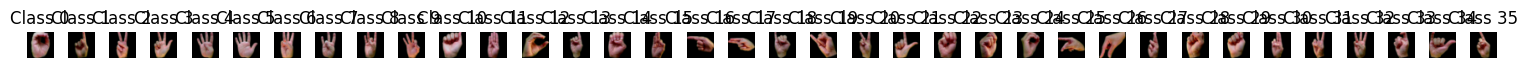


Model architecture:
ASLClassifierCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=36, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
         MaxPool2d-2           [-1, 32, 16, 16]   

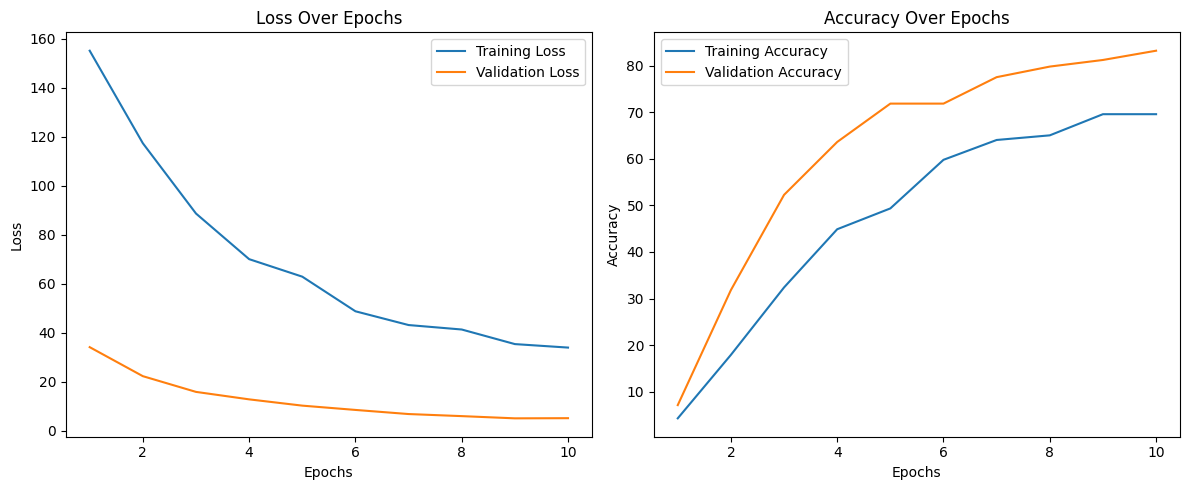

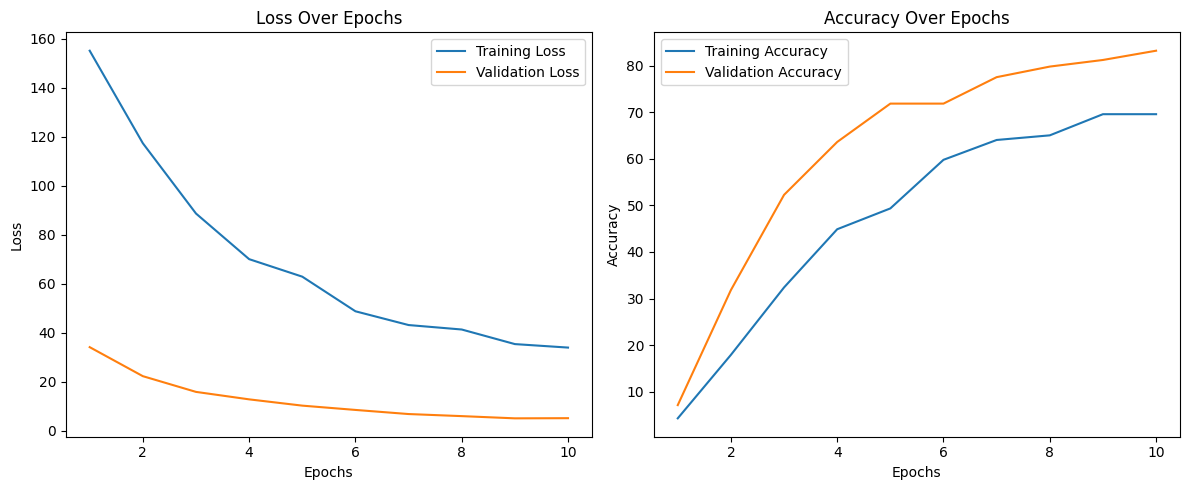

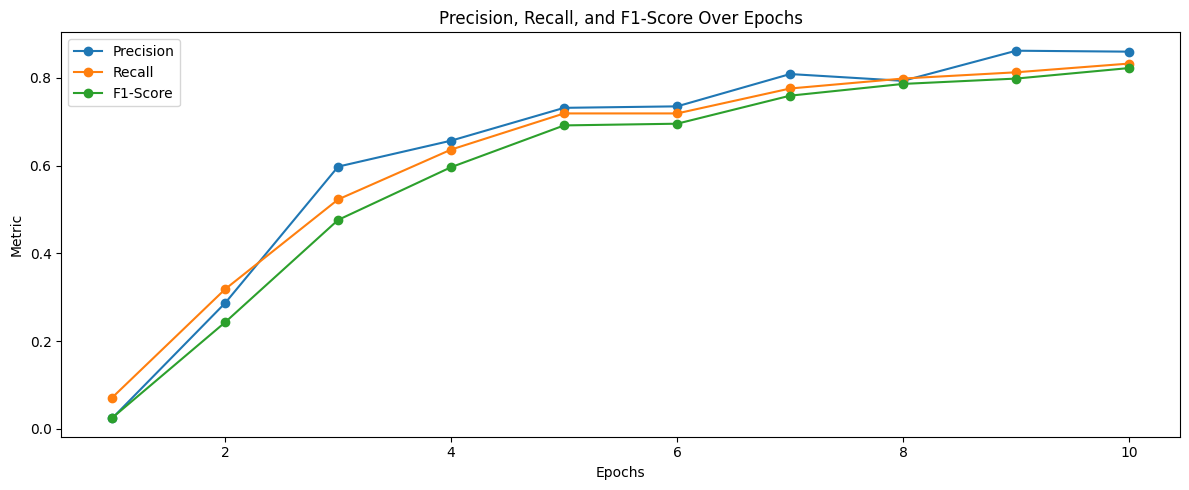

<Figure size 1000x800 with 0 Axes>

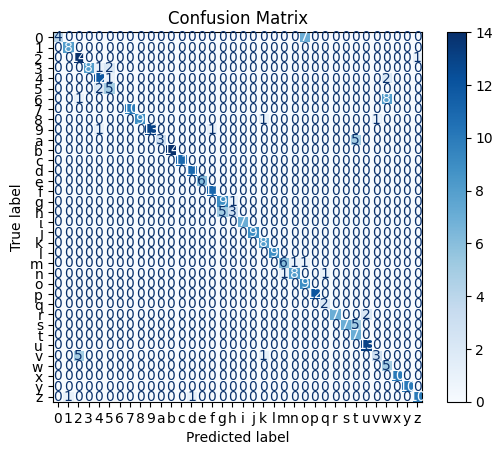


=== Fold 2/5 ===
Training Fold 2...
Epoch 1/10 -> Train Loss: 153.0740, Train Acc: 4.83%, Valid Loss: 36.8043, Valid Acc: 5.40%, Precision: 0.06, Recall: 0.05, F1-Score: 0.02
Epoch 2/10 -> Train Loss: 126.6976, Train Acc: 14.84%, Valid Loss: 26.4916, Valid Acc: 24.15%, Precision: 0.23, Recall: 0.24, F1-Score: 0.20
Epoch 3/10 -> Train Loss: 99.2357, Train Acc: 26.07%, Valid Loss: 19.7899, Valid Acc: 41.76%, Precision: 0.48, Recall: 0.42, F1-Score: 0.37
Epoch 4/10 -> Train Loss: 79.2216, Train Acc: 38.78%, Valid Loss: 14.4157, Valid Acc: 55.68%, Precision: 0.62, Recall: 0.56, F1-Score: 0.53
Epoch 5/10 -> Train Loss: 68.3936, Train Acc: 44.74%, Valid Loss: 11.9551, Valid Acc: 63.35%, Precision: 0.57, Recall: 0.63, F1-Score: 0.58
Epoch 6/10 -> Train Loss: 55.8538, Train Acc: 52.56%, Valid Loss: 9.6831, Valid Acc: 67.61%, Precision: 0.72, Recall: 0.68, F1-Score: 0.65
Epoch 7/10 -> Train Loss: 50.8029, Train Acc: 59.09%, Valid Loss: 8.5093, Valid Acc: 69.60%, Precision: 0.70, Recall: 0.70, 

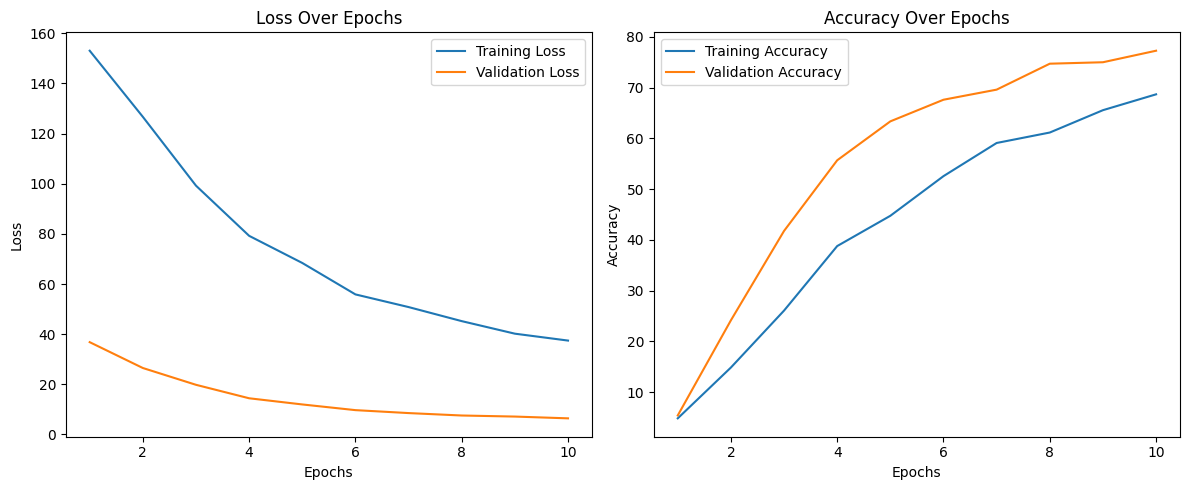

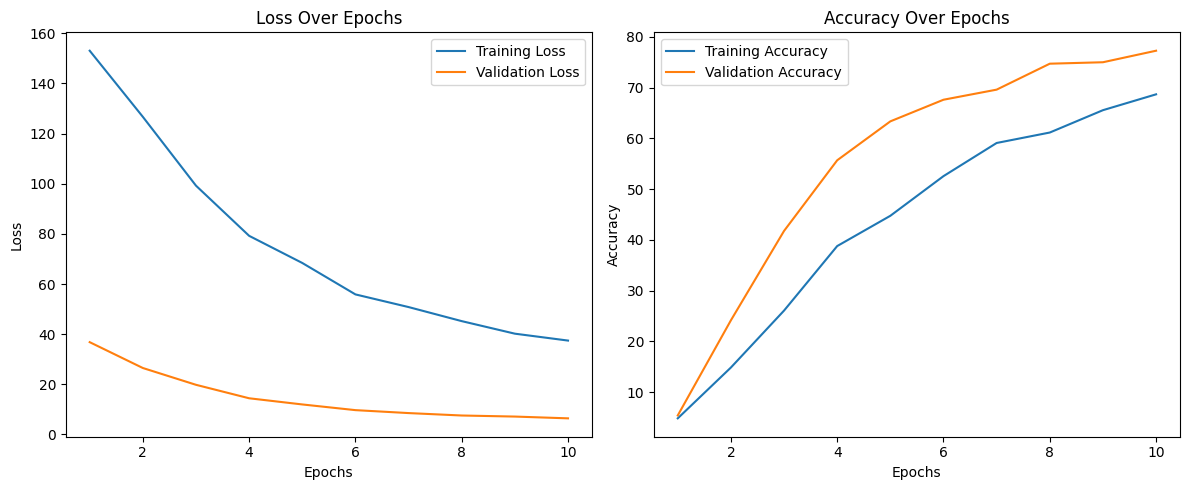

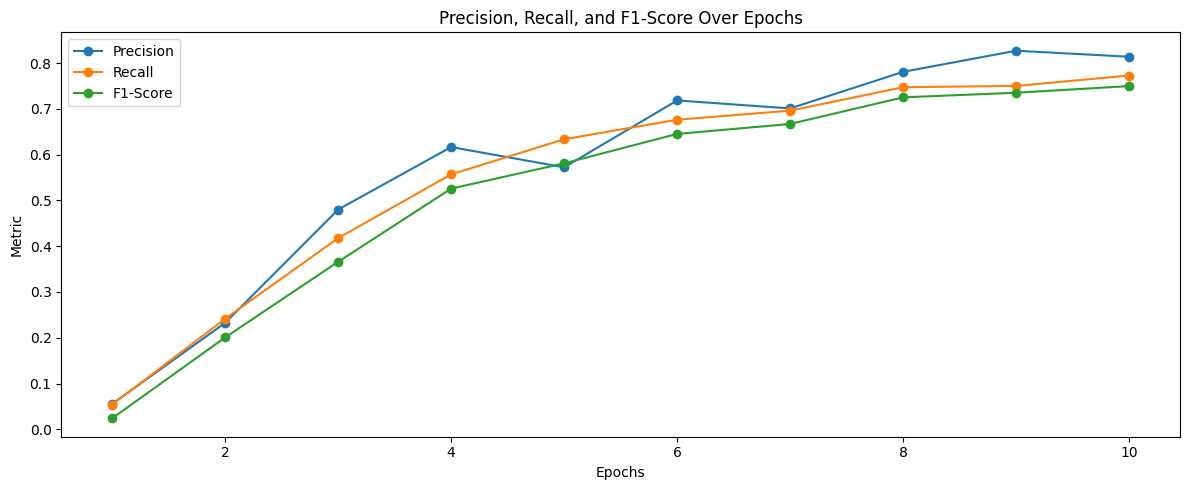

<Figure size 1000x800 with 0 Axes>

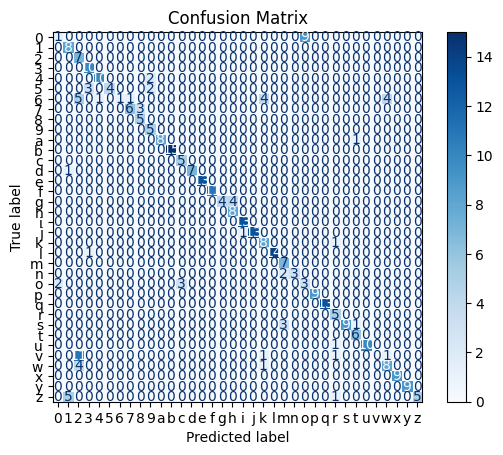


=== Fold 3/5 ===
Training Fold 3...
Epoch 1/10 -> Train Loss: 157.7663, Train Acc: 2.91%, Valid Loss: 39.3036, Valid Acc: 2.84%, Precision: 0.00, Recall: 0.03, F1-Score: 0.00
Epoch 2/10 -> Train Loss: 138.5467, Train Acc: 11.22%, Valid Loss: 28.2136, Valid Acc: 17.61%, Precision: 0.19, Recall: 0.18, F1-Score: 0.12
Epoch 3/10 -> Train Loss: 105.4847, Train Acc: 24.29%, Valid Loss: 21.5350, Valid Acc: 31.82%, Precision: 0.35, Recall: 0.32, F1-Score: 0.27
Epoch 4/10 -> Train Loss: 86.6131, Train Acc: 33.31%, Valid Loss: 16.8720, Valid Acc: 50.00%, Precision: 0.63, Recall: 0.50, F1-Score: 0.47
Epoch 5/10 -> Train Loss: 72.4540, Train Acc: 43.89%, Valid Loss: 13.0252, Valid Acc: 58.52%, Precision: 0.63, Recall: 0.59, F1-Score: 0.55
Epoch 6/10 -> Train Loss: 59.2898, Train Acc: 52.34%, Valid Loss: 10.6223, Valid Acc: 65.34%, Precision: 0.70, Recall: 0.65, F1-Score: 0.62
Epoch 7/10 -> Train Loss: 53.6104, Train Acc: 57.32%, Valid Loss: 8.9992, Valid Acc: 75.57%, Precision: 0.79, Recall: 0.76

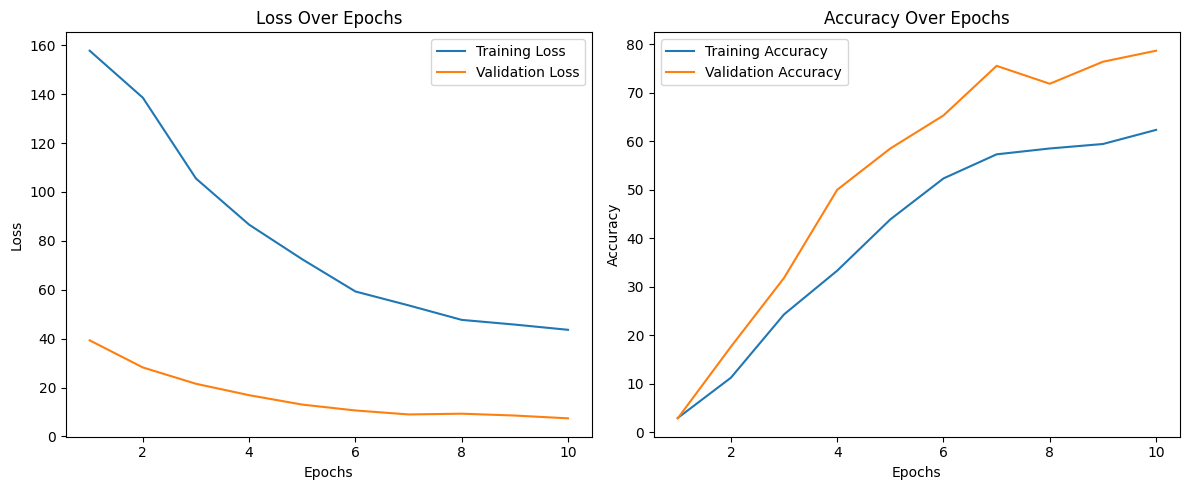

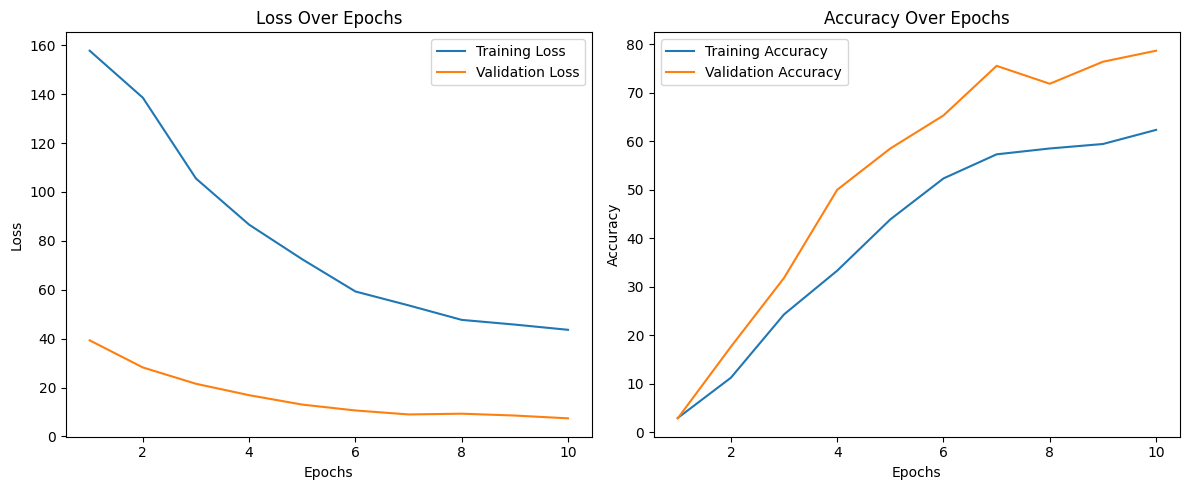

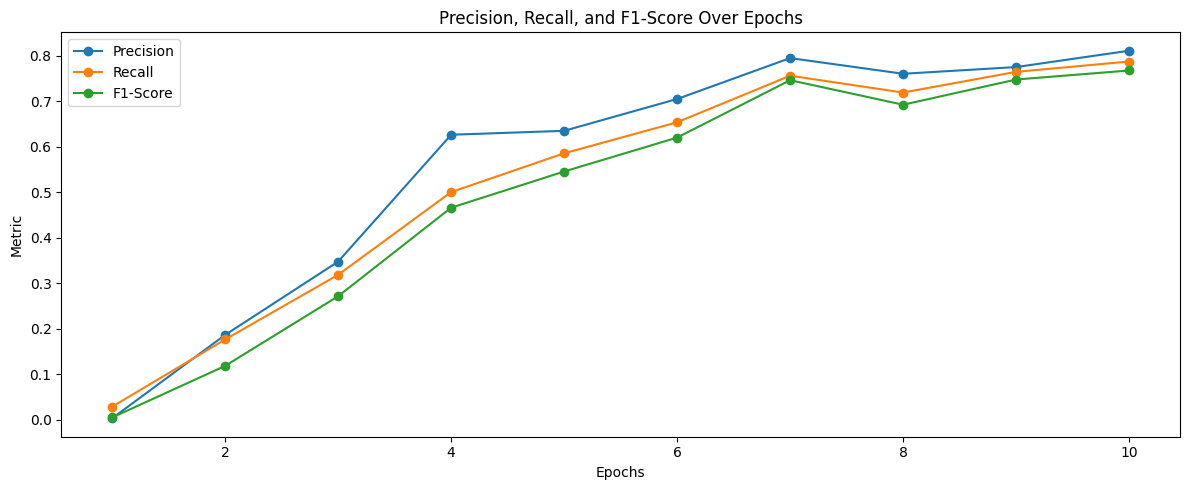

<Figure size 1000x800 with 0 Axes>

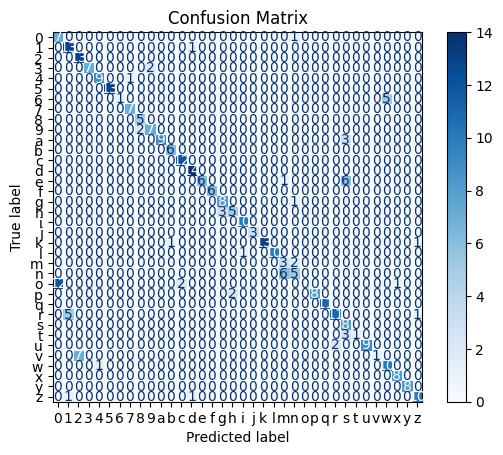


=== Fold 4/5 ===
Training Fold 4...
Epoch 1/10 -> Train Loss: 157.8904, Train Acc: 3.62%, Valid Loss: 39.4346, Valid Acc: 3.41%, Precision: 0.00, Recall: 0.03, F1-Score: 0.00
Epoch 2/10 -> Train Loss: 150.5640, Train Acc: 6.39%, Valid Loss: 31.0113, Valid Acc: 16.48%, Precision: 0.08, Recall: 0.16, F1-Score: 0.09
Epoch 3/10 -> Train Loss: 112.3401, Train Acc: 17.90%, Valid Loss: 20.7388, Valid Acc: 35.51%, Precision: 0.38, Recall: 0.36, F1-Score: 0.29
Epoch 4/10 -> Train Loss: 90.2700, Train Acc: 31.61%, Valid Loss: 14.6758, Valid Acc: 50.85%, Precision: 0.50, Recall: 0.51, F1-Score: 0.45
Epoch 5/10 -> Train Loss: 72.7146, Train Acc: 40.91%, Valid Loss: 12.4209, Valid Acc: 61.65%, Precision: 0.69, Recall: 0.62, F1-Score: 0.59
Epoch 6/10 -> Train Loss: 56.6157, Train Acc: 52.98%, Valid Loss: 8.6389, Valid Acc: 73.30%, Precision: 0.74, Recall: 0.73, F1-Score: 0.71
Epoch 7/10 -> Train Loss: 48.0948, Train Acc: 59.45%, Valid Loss: 6.7054, Valid Acc: 80.11%, Precision: 0.82, Recall: 0.80, 

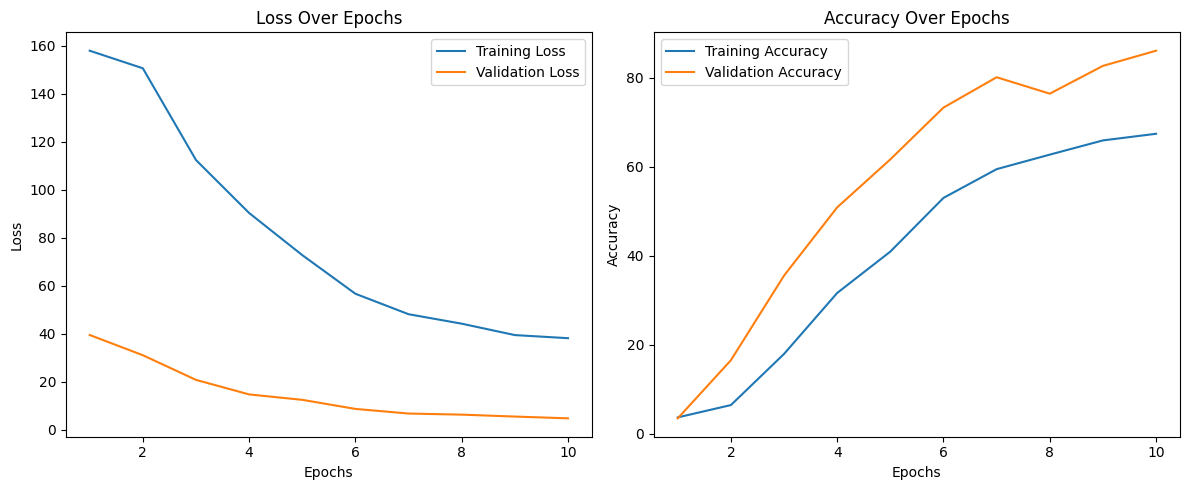

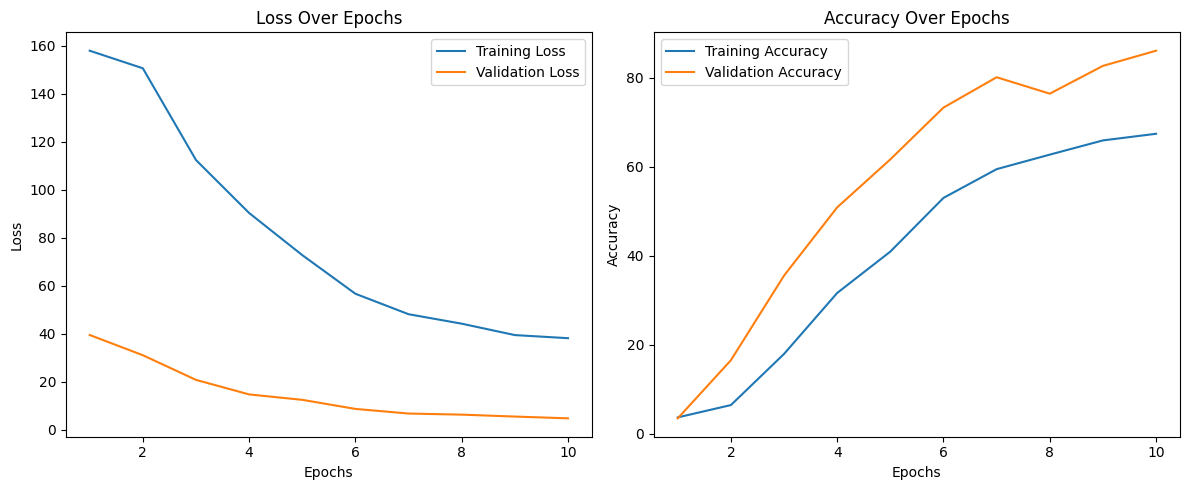

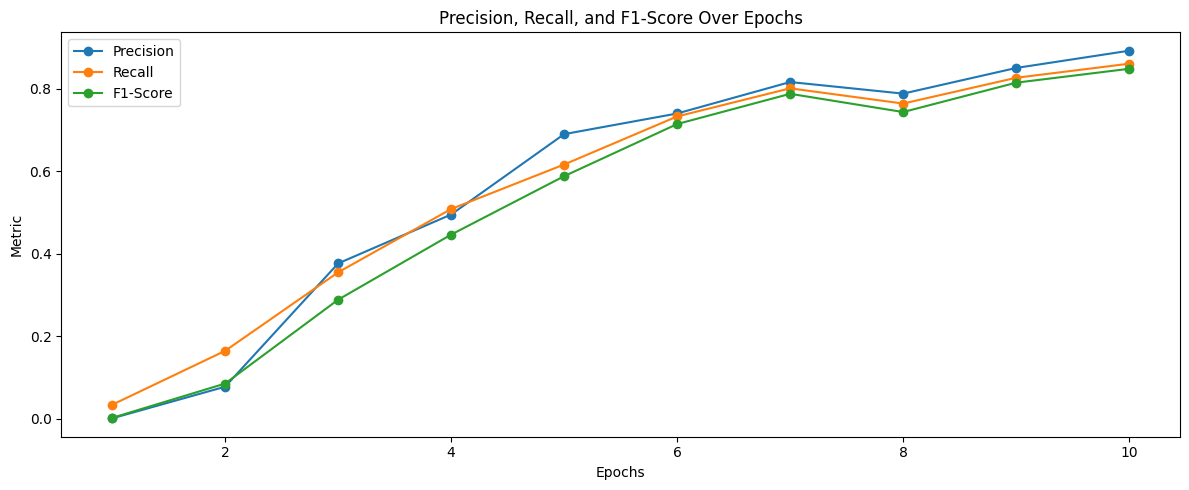

<Figure size 1000x800 with 0 Axes>

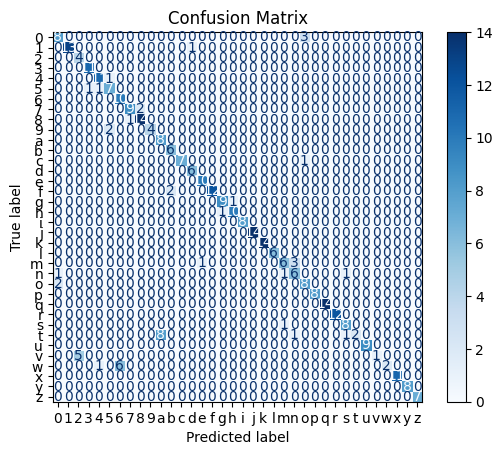


=== Fold 5/5 ===
Training Fold 5...
Epoch 1/10 -> Train Loss: 157.8068, Train Acc: 2.84%, Valid Loss: 39.1539, Valid Acc: 1.99%, Precision: 0.00, Recall: 0.02, F1-Score: 0.00
Epoch 2/10 -> Train Loss: 129.7787, Train Acc: 12.57%, Valid Loss: 24.4556, Valid Acc: 24.72%, Precision: 0.13, Recall: 0.25, F1-Score: 0.15
Epoch 3/10 -> Train Loss: 91.1171, Train Acc: 30.68%, Valid Loss: 15.2044, Valid Acc: 52.84%, Precision: 0.48, Recall: 0.53, F1-Score: 0.45
Epoch 4/10 -> Train Loss: 67.1978, Train Acc: 45.53%, Valid Loss: 11.0538, Valid Acc: 66.76%, Precision: 0.69, Recall: 0.67, F1-Score: 0.63
Epoch 5/10 -> Train Loss: 53.1319, Train Acc: 55.75%, Valid Loss: 8.4338, Valid Acc: 72.16%, Precision: 0.74, Recall: 0.72, F1-Score: 0.69
Epoch 6/10 -> Train Loss: 44.2769, Train Acc: 61.86%, Valid Loss: 7.0291, Valid Acc: 75.85%, Precision: 0.80, Recall: 0.76, F1-Score: 0.73
Epoch 7/10 -> Train Loss: 38.6714, Train Acc: 65.91%, Valid Loss: 5.6545, Valid Acc: 80.11%, Precision: 0.80, Recall: 0.80, F

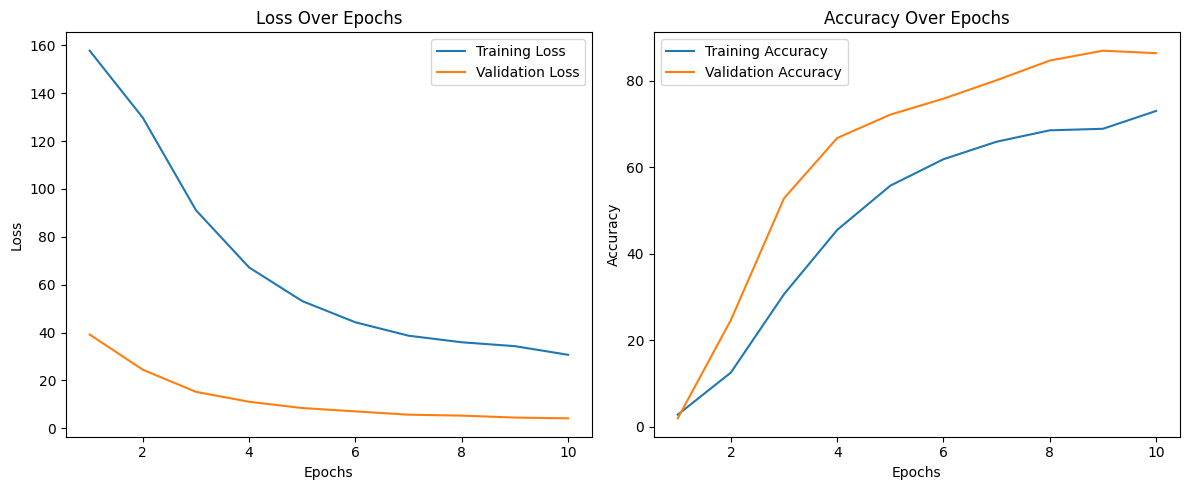

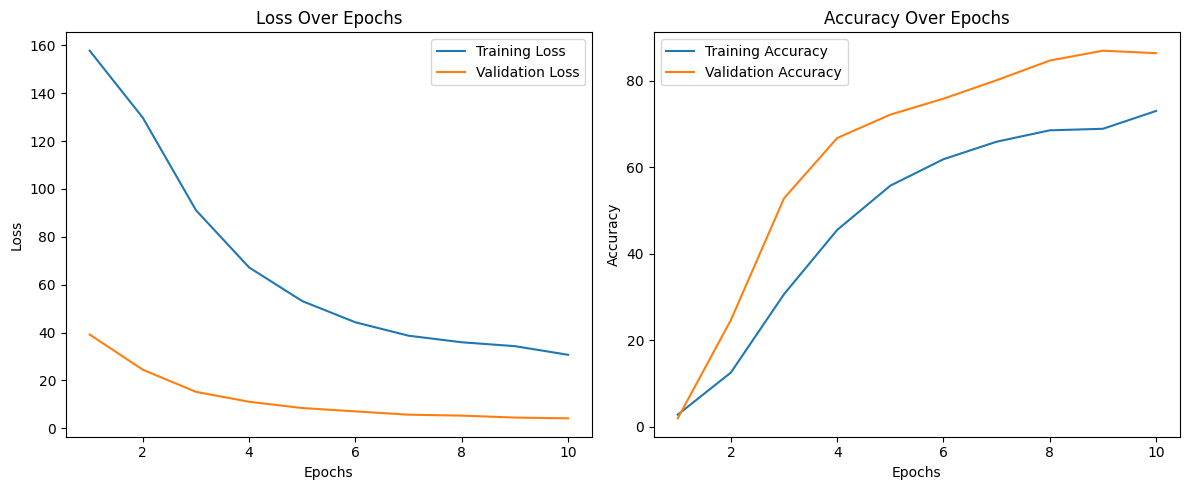

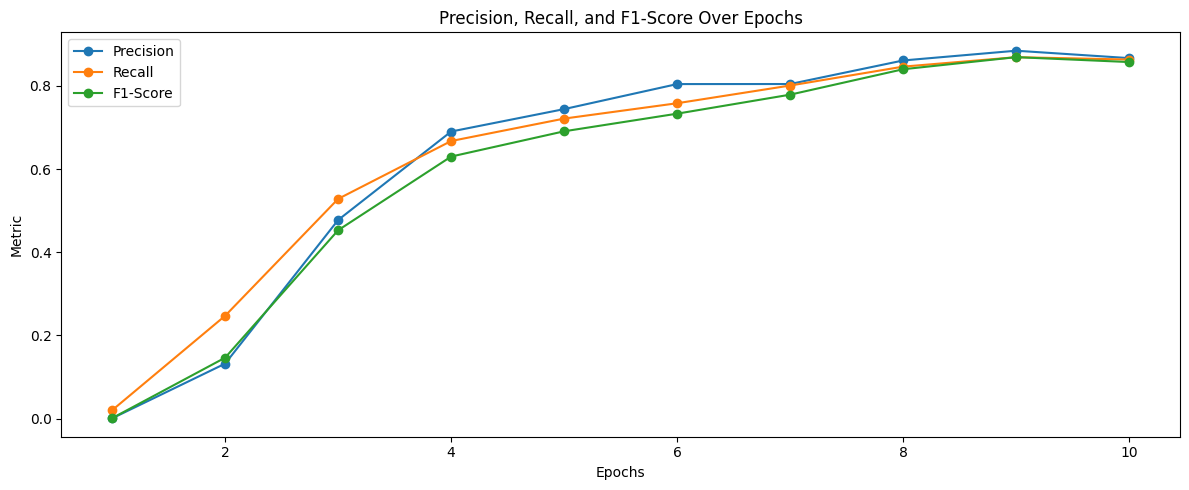

<Figure size 1000x800 with 0 Axes>

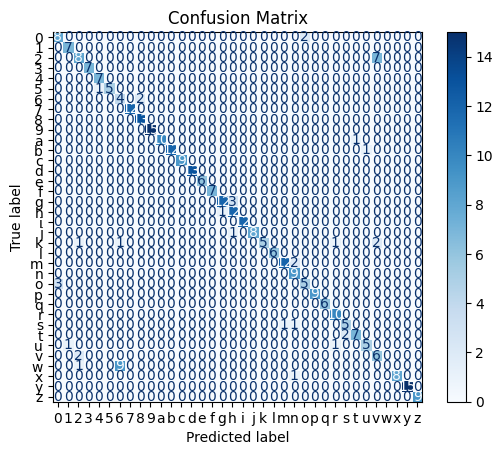


=== Cross-Validation Results ===
Fold 1: Validation Accuracy = 83.24%
Fold 2: Validation Accuracy = 77.27%
Fold 3: Validation Accuracy = 78.69%
Fold 4: Validation Accuracy = 86.08%
Fold 5: Validation Accuracy = 86.36%
Best Validation Accuracy: 86.36%
Best model from cross-validation saved to asl_classifier_best_cnn.pth


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


# CNN Model for Classification
class ASLClassifierCNN(nn.Module):
    def __init__(self, num_classes):
        """
        Initialize the CNN model layers.

        Args:
            num_classes (int): Number of output classes (e.g., 36 for ASL digits and letters).
        """

        super(ASLClassifierCNN, self).__init__()  # Initialize the parent `nn.Module` class.

        # First convolutional layer: 3 input channels (RGB), 32 filters, 3x3 kernel size
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)  # Downsamples by taking the max in 2x2 windows.

        # Second convolutional layer: 32 input channels, 64 filters, 3x3 kernel size
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)  # Further downsampling.

        # Third convolutional layer: 64 input channels, 128 filters, 3x3 kernel size
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)  # Final downsampling.

        # Fully connected (dense) layers:
        # Input size is determined by the image dimensions after convolution and pooling.
        self.fc1 = nn.Linear(128 * 4 * 4, 128)  # First fully connected layer with 128 neurons.
        self.fc2 = nn.Linear(128, 64)  # Second fully connected layer with 64 neurons.
        self.fc3 = nn.Linear(64, num_classes)  # Final layer, one output per class.

        # Dropout layer to prevent overfitting by randomly zeroing 50% of the neurons during training.
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        """
        Forward pass of the model.

        Args:
            x (Tensor): Input tensor of shape (batch_size, 3, height, width).

        Returns:
            Tensor: Output predictions for each class.
        """

        x = F.relu(self.conv1(x))  # Apply first convolution + ReLU activation.
        x = self.pool1(x)  # Downsample using max pooling.

        x = F.relu(self.conv2(x))  # Apply second convolution + ReLU activation.
        x = self.pool2(x)  # Downsample using max pooling.

        x = F.relu(self.conv3(x))  # Apply third convolution + ReLU activation.
        x = self.pool3(x)  # Downsample using max pooling.

        x = x.view(x.size(0), -1)  # Flatten the tensor for input to the dense layers.

        x = F.relu(self.fc1(x))  # First dense layer + ReLU activation.
        x = self.dropout(x)  # Apply dropout for regularization.
        x = F.relu(self.fc2(x))  # Second dense layer + ReLU activation.
        x = self.fc3(x)  # Final layer for class predictions.

        return x  # Return the class scores.


# Training and Validation Functions
def train_model(model, train_loader, valid_loader, criterion, optimizer, scheduler, epochs, device):

    """
    Train and validate the CNN model.

    Args:
        model (nn.Module): The CNN model to train.
        train_loader (DataLoader): DataLoader for the training dataset.
        valid_loader (DataLoader): DataLoader for the validation dataset.
        criterion: Loss function (e.g., CrossEntropyLoss).
        optimizer: Optimization algorithm (e.g., Adam).
        scheduler: Learning rate scheduler.
        epochs (int): Number of training epochs.
        device (str): Device to use ('cuda' or 'cpu').

    Returns:
        Tuple: Training and validation losses, accuracies, and classification metrics.
    """

    train_losses, valid_losses = [], []  # Lists to store losses for each epoch.
    train_accuracies, valid_accuracies = [], []  # Lists to store accuracies for each epoch.
    precisions, recalls, f1_scores = [], [], []  # Metrics to evaluate model performance.
    final_conf_matrix = None  # Confusion matrix for the last validation epoch, to store the confusion matrix from the last epoch

    for epoch in range(epochs):  # Loop over each epoch.
        # Training phase
        model.train()  # Set the model to training mode.
        train_loss, correct_train, total_train = 0, 0, 0  # Initialize metrics.

        for images, labels in train_loader:  # Loop through training batches.
            images, labels = images.to(device), labels.to(device)  # Send data to device (GPU/CPU).
            optimizer.zero_grad()  # Reset gradients from the previous batch.
            outputs = model(images)  # Forward pass through the model.
            loss = criterion(outputs, labels)  # Compute the loss.
            loss.backward()  # Backward pass to compute gradients.
            optimizer.step()  # Update model parameters using the optimizer.

            train_loss += loss.item()  # Accumulate training loss.
            _, predicted = torch.max(outputs, 1)  # Get the predicted class for each image.
            total_train += labels.size(0)  # Total number of training samples.
            correct_train += (predicted == labels).sum().item()  # Count correctly predicted samples.

        train_accuracy = 100 * correct_train / total_train  # Calculate training accuracy.
        train_losses.append(train_loss)  # Append loss for this epoch.
        train_accuracies.append(train_accuracy)  # Append accuracy for this epoch.

        # Validation phase
        model.eval()  # Set the model to evaluation mode.
        valid_loss, correct_valid, total_valid = 0, 0, 0  # Initialize metrics.
        all_preds, all_labels = [], []  # To store predictions and labels for metrics.

        with torch.no_grad():  # Disable gradient computation for efficiency.
            for images, labels in valid_loader:  # Loop through validation batches.
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)  # Compute the loss.

                valid_loss += loss.item()  # Accumulate validation loss.
                _, predicted = torch.max(outputs, 1)  # Get predicted classes.
                total_valid += labels.size(0)  # Total number of validation samples.
                correct_valid += (predicted == labels).sum().item()  # Count correct predictions.

                all_preds.extend(predicted.cpu().numpy())  # Store predictions for metrics.
                all_labels.extend(labels.cpu().numpy())  # Store labels for metrics.

        valid_accuracy = 100 * correct_valid / total_valid  # Calculate validation accuracy.
        valid_losses.append(valid_loss)  # Append loss for this epoch.
        valid_accuracies.append(valid_accuracy)  # Append accuracy for this epoch.

        # Compute precision, recall, F1-score, and confusion matrix for this epoch.
        precision = precision_score(all_labels, all_preds, average='weighted', zero_division=0)
        recall = recall_score(all_labels, all_preds, average='weighted', zero_division=0)
        f1 = f1_score(all_labels, all_preds, average='weighted', zero_division=0)
        conf_matrix = confusion_matrix(all_labels, all_preds)

        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

        if epoch == epochs - 1:  # Store the confusion matrix from the last epoch.
            final_conf_matrix = conf_matrix

        scheduler.step()  # Adjust the learning rate using the scheduler.

        # Print the metrics for this epoch.
        print(f"Epoch {epoch+1}/{epochs} -> "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}%, "
              f"Valid Loss: {valid_loss:.4f}, Valid Acc: {valid_accuracy:.2f}%, "
              f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")

    return train_losses, valid_losses, train_accuracies, valid_accuracies, precisions, recalls, f1_scores, final_conf_matrix


def visualize_confusion_matrix(conf_matrix, class_labels):
    """
    Visualizes the confusion matrix using sklearn's ConfusionMatrixDisplay.

    Args:
        conf_matrix (ndarray): Confusion matrix from sklearn.
        class_labels (list): List of class names.
    """

    plt.figure(figsize=(10, 8))
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)
    disp.plot(cmap=plt.cm.Blues, values_format='d')  # Display as a heatmap.
    plt.title("Confusion Matrix")
    plt.savefig('confusion_matrix.png')  # Save the figure as an image file.
    plt.show()  # Display the confusion matrix.


# Visualize Training and Validation Metrics
def visualize_training_metrics(train_losses, valid_losses, train_accuracies, valid_accuracies):
    """
    Visualizes training and validation losses and accuracies over epochs.
    """

    # Define the range of epochs (1 to the total number of epochs)
    epochs = range(1, len(train_losses) + 1)

    # Create a figure for the plots with a specified size
    plt.figure(figsize=(12, 5))

    # Loss Plot: Training vs Validation Loss
    plt.subplot(1, 2, 1)  # First subplot (1 row, 2 columns, position 1)
    plt.plot(epochs, train_losses, label='Training Loss')  # Plot training loss
    plt.plot(epochs, valid_losses, label='Validation Loss')  # Plot validation loss
    plt.title("Loss Over Epochs")  # Title for the loss plot
    plt.xlabel("Epochs")  # X-axis label
    plt.ylabel("Loss")  # Y-axis label
    plt.legend()  # Add a legend for clarity


    # Accuracy Plot: Training vs Validation Accuracy
    plt.subplot(1, 2, 2)  # Second subplot (1 row, 2 columns, position 2)
    plt.plot(epochs, train_accuracies, label='Training Accuracy')  # Plot training accuracy
    plt.plot(epochs, valid_accuracies, label='Validation Accuracy')  # Plot validation accuracy
    plt.title("Accuracy Over Epochs")  # Title for the accuracy plot
    plt.xlabel("Epochs")  # X-axis label
    plt.ylabel("Accuracy")  # Y-axis label
    plt.legend()  # Add a legend for clarity

    # Adjust layout for better spacing and save the plot
    plt.tight_layout()
    plt.savefig('training_metrics.png')  # Save the visualization as an image
    plt.show()  # Display the plot



# Bias-Variance Analysis Function
def analyze_bias_variance(train_losses, valid_losses, train_accuracies, valid_accuracies):

    """
    Analyzes the bias-variance tradeoff by comparing training and validation metrics.
    """

    # Check if data is available for analysis
    if not train_losses or not valid_losses:
        print("Bias-variance data is empty.")  # Notify if there is no data
        return

    # Define the range of epochs (1 to the total number of epochs)
    epochs = range(1, len(train_losses) + 1)

    # Create a figure for the plots with a specified size
    plt.figure(figsize=(12, 5))


    # Loss Plot: Training vs Validation Loss
    plt.subplot(1, 2, 1)  # First subplot (1 row, 2 columns, position 1)
    plt.plot(epochs, train_losses, label='Training Loss')  # Plot training loss
    plt.plot(epochs, valid_losses, label='Validation Loss')  # Plot validation loss
    plt.title("Loss Over Epochs")  # Title for the loss plot
    plt.xlabel("Epochs")  # X-axis label
    plt.ylabel("Loss")  # Y-axis label
    plt.legend()  # Add a legend for clarity

    # Accuracy Plot: Training vs Validation Accuracy
    plt.subplot(1, 2, 2)  # Second subplot (1 row, 2 columns, position 2)
    plt.plot(epochs, train_accuracies, label='Training Accuracy')  # Plot training accuracy
    plt.plot(epochs, valid_accuracies, label='Validation Accuracy')  # Plot validation accuracy
    plt.title("Accuracy Over Epochs")  # Title for the accuracy plot
    plt.xlabel("Epochs")  # X-axis label
    plt.ylabel("Accuracy")  # Y-axis label
    plt.legend()  # Add a legend for clarity

    # Adjust layout for better spacing and save the plot
    plt.tight_layout()
    plt.savefig('bias_variance_analysis.png')  # Save the visualization as an image
    plt.show()  # Display the plot


def visualize_classification_metrics(precisions, recalls, f1_scores):
    """
    Visualizes precision, recall, and F1-score over epochs.
    """

    # Define the range of epochs (1 to the total number of epochs)
    epochs = range(1, len(precisions) + 1)

    # Create a figure for the plots with a specified size
    plt.figure(figsize=(12, 5))

    # Plot precision, recall, and F1-score
    plt.plot(epochs, precisions, label='Precision', marker='o')  # Plot precision with markers
    plt.plot(epochs, recalls, label='Recall', marker='o')  # Plot recall with markers
    plt.plot(epochs, f1_scores, label='F1-Score', marker='o')  # Plot F1-score with markers

    # Add titles and labels
    plt.title("Precision, Recall, and F1-Score Over Epochs")  # Title for the plot
    plt.xlabel("Epochs")  # X-axis label
    plt.ylabel("Metric")  # Y-axis label
    plt.legend()  # Add a legend for clarity

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()



from sklearn.model_selection import KFold

def cross_validate_model(dataset, model_class, criterion, optimizer_class, scheduler_class, hyperparams, k=5, epochs=10, device='cpu'):
    """
    Perform k-fold cross-validation and analyze metrics for each fold.
    """

    # Initialize the KFold cross-validator
    kfold = KFold(n_splits=k, shuffle=True, random_state=42)
    fold_results = []  # To store results for each fold
    best_model_state = None  # To save the state of the best-performing model
    best_accuracy = 0.0  # Track the highest validation accuracy

    # Retrieve the classes from the dataset for visualization
    classes = dataset.dataset.classes  # Access the `classes` attribute from the original dataset

    for fold, (train_idx, val_idx) in enumerate(kfold.split(range(len(dataset)))):
        print(f"\n=== Fold {fold + 1}/{k} ===")  # Indicate the current fold

        # Create training and validation subsets
        train_subset = torch.utils.data.Subset(dataset, train_idx)
        val_subset = torch.utils.data.Subset(dataset, val_idx)

        # Propagate the `classes` attribute to subsets
        train_subset.dataset.classes = classes
        val_subset.dataset.classes = classes

        # Create DataLoaders for the subsets
        train_loader = DataLoader(train_subset, batch_size=hyperparams['batch_size'], shuffle=True)
        val_loader = DataLoader(val_subset, batch_size=hyperparams['batch_size'], shuffle=False)

        # Initialize the model, optimizer, and scheduler
        model = model_class(num_classes=len(classes)).to(device)
        optimizer = optimizer_class(model.parameters(), **hyperparams['optimizer'])
        scheduler = scheduler_class(optimizer, **hyperparams['scheduler'])

        # Train and evaluate the model for the current fold
        print(f"Training Fold {fold + 1}...")
        train_losses, val_losses, train_acc, val_acc, precisions, recalls, f1_scores, conf_matrix = train_model(
            model, train_loader, val_loader, criterion, optimizer, scheduler, epochs, device
        )

        # Visualize metrics and confusion matrix for the fold
        print(f"Analyzing metrics for Fold {fold + 1}...")
        visualize_training_metrics(train_losses, val_losses, train_acc, val_acc)
        analyze_bias_variance(train_losses, val_losses, train_acc, val_acc)
        visualize_classification_metrics(precisions, recalls, f1_scores)
        visualize_confusion_matrix(conf_matrix, classes)

        # Log the final validation accuracy for this fold
        fold_results.append(val_acc[-1])

        # Save the best-performing model's state
        if val_acc[-1] > best_accuracy:
            best_accuracy = val_acc[-1]
            best_model_state = model.state_dict()

    # Print overall cross-validation results
    print("\n=== Cross-Validation Results ===")
    for i, acc in enumerate(fold_results):
        print(f"Fold {i + 1}: Validation Accuracy = {acc:.2f}%")
    print(f"Best Validation Accuracy: {best_accuracy:.2f}%")

    # Return the best model state and overall results
    return best_model_state, best_accuracy, fold_results



# Main Workflow
# Prepare datasets with a combined range of numeric and alphabetic classes
def main():
    # Path to the Kaggle authentication JSON file
    kaggle_json_path = "kaggle.json"

    # Kaggle dataset identifier
    dataset_id = "ayuraj/asl-dataset"

    # Directory where the dataset will be stored after extraction
    output_dir = "./asl_dataset"

    # Path to the directory containing the actual dataset files
    data_dir = os.path.join(output_dir, "asl_dataset")

    # Download the dataset from Kaggle and extract it to the specified directory
    download_and_extract_dataset(dataset_id, kaggle_json_path, output_dir)

    # Data transformations for training data
    # Includes resizing images, random augmentations (rotation, flip, etc.), normalization, and conversion to tensors
    train_transform = transforms.Compose([
        transforms.Resize((32, 32)),  # Resize images to 32x32 pixels
        transforms.RandomRotation(15),  # Randomly rotate images by up to 15 degrees
        transforms.RandomHorizontalFlip(),  # Randomly flip images horizontally
        transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # Randomly shift images slightly
        transforms.ToTensor(),  # Convert images to PyTorch tensors
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize pixel values to range [-1, 1]
    ])

    # Data transformations for test data
    # Includes resizing, normalization, and conversion to tensors
    test_transform = transforms.Compose([
        transforms.Resize((32, 32)),  # Resize images to 32x32 pixels
        transforms.ToTensor(),  # Convert images to PyTorch tensors
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize pixel values to range [-1, 1]
    ])

    # Define the mapping of classes (0-9 for digits and a-z for letters)
    # Create a list combining strings for digits (0-9) and letters (a-z)
    full_classes = list(map(str, range(10))) + list(map(chr, range(ord('a'), ord('z') + 1)))

    # Dynamically limit the subset of classes to use for the dataset
    SUBSET_END_INDEX = 35 # 0-9 remain as 0-9. 10 will correspond to a, 11 to b, and so on up to 35 for z.
    class_subset = full_classes[:SUBSET_END_INDEX + 1]


    # Use the dataset preparation function to split data into train, validation, and test sets
    # Applies the specified transformations to training and testing datasets
    train_dataset, valid_dataset, test_dataset = prepare_datasets(data_dir, class_subset, train_transform, test_transform)

    # Define the batch size for training and validation loaders
    dynamic_batch_size = 32

    # Create DataLoader for training data (shuffling enabled)
    train_loader = DataLoader(train_dataset, batch_size=dynamic_batch_size, shuffle=True)

    # Create DataLoader for validation data (no shuffling)
    valid_loader = DataLoader(valid_dataset, batch_size=dynamic_batch_size, shuffle=False)


    # Visualize dataset one sample per class from the training dataset
    print("\nVisualizing dataset samples:")
    visualize_classes(train_loader, class_subset)

    # Model setup
    # Calculate the total number of classes in the subset
    num_classes = len(class_subset)

    # Check if GPU (CUDA) is available and set the computation device accordingly
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Initialize the ASLClassifierCNN model with the appropriate number of output classes
    model = ASLClassifierCNN(num_classes=num_classes).to(device)

    # Display the model architecture
    print("\nModel architecture:")
    print(model)

    # Use the torchsummary package to print a detailed summary of the model, including input size
    summary(model, (3, 32, 32))  # (3, 32, 32) corresponds to the input shape (RGB images, 32x32 pixels)

    # Define the loss function (CrossEntropyLoss for multi-class classification)
    criterion = nn.CrossEntropyLoss()

    # Define the optimizer (Adam optimizer with learning rate and weight decay for regularization)
    optimizer = optim.Adam(model.parameters(), lr=0.002, weight_decay=1e-4)

    # Define the learning rate scheduler (reduces learning rate every 5 epochs by a factor of 0.5)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

    # Flag to toggle cross-validation
    use_cross_validation = True  # Set to True to perform k-fold cross-validation

    if use_cross_validation:
        # Cross-validation hyperparameters
        hyperparams = {
            'batch_size': dynamic_batch_size, # Batch size for data loaders
            'optimizer': {'lr': 0.002, 'weight_decay': 1e-4}, # Optimizer settings
            'scheduler': {'step_size': 5, 'gamma': 0.5}# Scheduler settings
        }


        # Perform k-fold cross-validation using the cross_validate_model function
        print("\nStarting Cross-Validation...")
        best_model_state, best_accuracy, fold_results = cross_validate_model(
            train_dataset,  # Training dataset
            model_class=ASLClassifierCNN,  # Model class
            criterion=criterion,  # Loss function
            optimizer_class=optim.Adam,  # Optimizer class
            scheduler_class=torch.optim.lr_scheduler.StepLR,  # Scheduler class
            hyperparams=hyperparams,  # Hyperparameters for optimizer and scheduler
            k=5,  # Number of folds for cross-validation
            epochs=10,  # Number of epochs per fold
            device=device  # Computation device
        )

        # Save the best model from cross-validation
        model_save_path = "asl_classifier_best_cnn.pth"
        torch.save(best_model_state, model_save_path)
        print(f"Best model from cross-validation saved to {model_save_path}")

    else:
        # Perform standard training using the train_model function
        print("\nTraining the model...")
        train_losses, valid_losses, train_accuracies, valid_accuracies, precisions, recalls, f1_scores, conf_matrix = train_model(
            model,  # Initialized model
            train_loader,  # Training data loader
            valid_loader,  # Validation data loader
            criterion,  # Loss function
            optimizer,  # Optimizer
            scheduler,  # Learning rate scheduler
            epochs=10,  # Number of training epochs
            device=device  # Computation device
        )

        # Visualize training and validation metrics over epochs
        visualize_training_metrics(train_losses, valid_losses, train_accuracies, valid_accuracies)

        # Visualize precision, recall, and F1-score over epochs
        visualize_classification_metrics(precisions, recalls, f1_scores)

        # Visualize the confusion matrix
        visualize_confusion_matrix(conf_matrix, class_subset)

        # Analyze bias and variance from training and validation metrics
        analyze_bias_variance(train_losses, valid_losses, train_accuracies, valid_accuracies)

        # Save the trained model to a file
        model_save_path = "asl_classifier_cnn.pth"
        torch.save(model.state_dict(), model_save_path)
        print(f"Model saved to {model_save_path}")





if __name__ == "__main__":
    main()



# How to Identify Bias and Variance Using Graphs

Understanding bias and variance in your model involves analyzing trends in the training and validation metrics, which are visualized in the loss and accuracy graphs

# Bias (Underfitting)

What to Look For:
- Both training accuracy and validation accuracy remain consistently low (e.g., below 80%).
- The training loss decreases very slowly or stabilizes at a high value, and the validation loss stays similarly high.
- The training and validation curves closely follow each other with minimal or no gap.

Why It Happens:
    The model lacks the capacity to adequately learn the patterns in the data. It could be too simplistic or may need more epochs for training.

Fixes:
    Increase model complexity (e.g., add more layers or neurons). Train for more epochs or use a smaller learning rate to allow the model to converge more effectively.

# Variance (Overfitting)

What to Look For:
- Training accuracy becomes very high (e.g., above 90%), while validation accuracy lags significantly behind (e.g., with a gap greater than 10%).
- The training loss is very low, while the validation loss is much higher and plateaus instead of decreasing.
- The graph shows a clear divergence between training and validation curves.

Why It Happens:
    The model learns the training data too well, including noise or irrelevant patterns, but fails to generalize to new, unseen data.

Fixes:
    Add regularization techniques like dropout or weight decay. Reduce model complexity or increase the size of the training dataset. Use data augmentation to introduce more variability in the training data.

# Balanced Model

What to Look For:
- Training and validation accuracies are both high and close to each other (e.g., above 80% with a small gap of 2-5%).
- Both training loss and validation loss decrease steadily and stabilize at low values.
- The curves on the graph follow a similar trajectory without significant divergence.

Why It Happens:
    The model is well-trained and generalizes effectively to unseen data.

Next Steps:
    If additional accuracy is required, try fine-tuning hyperparameters, adding more data, or training for more epochs.

# How This Relates to Your Graphs

    Loss Graph:
        Bias: Both training and validation losses are high and don't decrease much.
        Variance: Training loss is low, but validation loss remains high.
        Balanced: Both losses decrease steadily and stabilize at similar low values.

    Accuracy Graph:
        Bias: Both training and validation accuracies are low and close to each other.
        Variance: Training accuracy is much higher than validation accuracy.
        Balanced: Both accuracies are high and close to each other.

By comparing your graphs to these patterns, you can determine whether your model suffers from bias, variance, or is balanced, and take the necessary actions to improve its performance.


Balanced training is achieved when the model performs well on both training and validation sets. In this case, training and validation accuracies are high and close to each other (within 10%), and the losses for both sets decrease steadily and converge over time. The results here indicate balanced training, with training accuracy at 76.93% and validation accuracy at 84.08%, and steadily decreasing losses without divergence. This suggests that the model has the right complexity and is generalizing effectively.

# Understanding and Determining Regularization Strength (λ) Using Graphs

The behavior of the model under different regularization strengths (λ values) can be understood by observing how training and validation metrics change across epochs. Here's a guide to interpreting the graphs and logs generated for varying λ values:

# No Regularization (λ = 0.0):

Graph Observations:
  - Training loss decreases rapidly, and training accuracy increases quickly, often nearing 100%. However, validation loss remains significantly higher, and validation accuracy lags far behind training accuracy.
  
Conclusion:

  - The model is overfitting. It learns the training data too well (including noise) but struggles to generalize to unseen data. The gap between training and validation metrics is a clear indicator of overfitting.

# Moderate Regularization (e.g., λ = 0.0001 or 0.001):

Graph Observations:
- Training and validation losses decrease steadily, and the gap between them narrows. Training and validation accuracies align closely, showing an improvement in generalization.

Conclusion:
- Regularization is working effectively at these values. The model avoids overfitting by penalizing overly large weights, resulting in better performance on unseen data. This balance between training and validation metrics indicates optimal bias-variance trade-off.

# Strong Regularization (e.g., λ = 0.01 or higher):
Graph Observations:
- Both training and validation losses remain relatively high or plateau. Training and validation accuracies stagnate or drop, failing to reach optimal levels.
Conclusion:
- The model is underfitting. Strong regularization overly constrains the model, limiting its ability to capture patterns in the data. As a result, the model performs poorly on both training and validation datasets.

# Graph Interpretation:
In the Loss vs. Epochs graph, overfitting is visible as a large gap between the training and validation loss curves (low λ). Underfitting is indicated when both curves remain high or plateau (high λ). In the Accuracy vs. Epochs graph, overfitting appears as high training accuracy with much lower validation accuracy. Underfitting results in low accuracy for both training and validation sets, with little improvement over epochs.

# Code Logic for λ Evaluation:
The code evaluates regularization strength by iteratively training the model with different λ values. For each λ, it computes and plots training and validation losses and accuracies.

These graphs provide a visual means to assess the trade-offs between bias and variance. By identifying the λ value where the gap between training and validation metrics is minimized, while maintaining high accuracies, users can select the optimal regularization strength for their model.

# Load Model

# Test Model with Test images

# Fine-Tuning the Pre-trained Model

Train a Pre-Trained model on our dataseet to improve its performance.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader, random_split
from PIL import Image
import os


In [ ]:
# Step 1: Enable CuDNN Benchmark for Faster Training
torch.backends.cudnn.benchmark = True




In [ ]:
# Step 2: Load the Pre-trained ResNet Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet18 = models.resnet18(pretrained=True)

# Modify the Last Fully Connected Layer for ASL Classification (36 classes)
num_classes = 36  # Digits 0-9 + Letters A-Z
resnet18.fc = nn.Linear(resnet18.fc.in_features, num_classes)
resnet18 = resnet18.to(device)

# Freeze All Layers Except the Fully Connected Layer
for param in resnet18.parameters():
    param.requires_grad = False
for param in resnet18.fc.parameters():
    param.requires_grad = True

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 116MB/s]


In [ ]:
# Step 3: Define Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet18.fc.parameters(), lr=0.001)


In [ ]:
# Step 4: Dataset Class
class ASLDataset(torch.utils.data.Dataset):
    def __init__(self, data_dir, classes, transform=None):
        self.data = []
        self.labels = []
        self.transform = transform
        for label, class_name in enumerate(classes):
            folder_path = os.path.join(data_dir, class_name)
            if os.path.isdir(folder_path):
                for file_name in os.listdir(folder_path):
                    file_path = os.path.join(folder_path, file_name)
                    if os.path.isfile(file_path):
                        img = Image.open(file_path).convert("L")
                        self.data.append(img)
                        self.labels.append(label)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image = self.data[idx]
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

In [ ]:
# Step 5: Transformations
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [ ]:
# Step 6: Load Dataset
data_dir = "/content/asl_dataset/asl_dataset"
classes = list(map(str, range(10))) + list("abcdefghijklmnopqrstuvwxyz")
asl_dataset = ASLDataset(data_dir, classes, transform=None)

# Split Dataset
train_size = int(0.7 * len(asl_dataset))
valid_size = int(0.15 * len(asl_dataset))
test_size = len(asl_dataset) - train_size - valid_size

train_dataset, valid_dataset, test_dataset = random_split(
    asl_dataset, [train_size, valid_size, test_size], generator=torch.Generator().manual_seed(42)
)

train_dataset.dataset.transform = train_transform
valid_dataset.dataset.transform = test_transform
test_dataset.dataset.transform = test_transform

# DataLoader
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [ ]:
# Step 7: Train Model
epochs = 10
train_losses, valid_losses = [], []
train_accuracies, valid_accuracies = [], []

for epoch in range(epochs):
    resnet18.train()
    train_loss, correct_train, total_train = 0.0, 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = resnet18(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = 100 * correct_train / total_train
    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(train_accuracy)

    resnet18.eval()
    valid_loss, correct_valid, total_valid = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in valid_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = resnet18(images)
            loss = criterion(outputs, labels)
            valid_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_valid += labels.size(0)
            correct_valid += (predicted == labels).sum().item()

    valid_accuracy = 100 * correct_valid / total_valid
    valid_losses.append(valid_loss / len(valid_loader))
    valid_accuracies.append(valid_accuracy)

    print(f"Epoch {epoch+1}/{epochs} -> Train Loss: {train_loss / len(train_loader):.4f}, "
          f"Train Acc: {train_accuracy:.2f}%, Valid Loss: {valid_loss / len(valid_loader):.4f}, "
          f"Valid Acc: {valid_accuracy:.2f}%")

Epoch 1/10 -> Train Loss: 3.0558, Train Acc: 25.11%, Valid Loss: 2.7432, Valid Acc: 25.46%
Epoch 2/10 -> Train Loss: 1.8853, Train Acc: 69.94%, Valid Loss: 1.7989, Valid Acc: 63.66%
Epoch 3/10 -> Train Loss: 1.2495, Train Acc: 83.18%, Valid Loss: 1.1750, Valid Acc: 81.43%
Epoch 4/10 -> Train Loss: 0.9034, Train Acc: 89.77%, Valid Loss: 0.9349, Valid Acc: 83.29%
Epoch 5/10 -> Train Loss: 0.7111, Train Acc: 90.11%, Valid Loss: 0.7833, Valid Acc: 84.35%
Epoch 6/10 -> Train Loss: 0.5887, Train Acc: 92.05%, Valid Loss: 0.6895, Valid Acc: 85.41%
Epoch 7/10 -> Train Loss: 0.4892, Train Acc: 93.92%, Valid Loss: 0.6100, Valid Acc: 85.15%
Epoch 8/10 -> Train Loss: 0.4301, Train Acc: 94.38%, Valid Loss: 0.5685, Valid Acc: 85.15%
Epoch 9/10 -> Train Loss: 0.3817, Train Acc: 94.72%, Valid Loss: 0.5115, Valid Acc: 87.53%
Epoch 10/10 -> Train Loss: 0.3326, Train Acc: 95.57%, Valid Loss: 0.4813, Valid Acc: 88.33%


In [ ]:
# Step 8: Save Model
model_save_path = "resnet18_finetuned_asl.pth"
torch.save(resnet18.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")

Model saved to resnet18_finetuned_asl.pth


In [ ]:
# Step 1: Enable CuDNN Benchmark
torch.backends.cudnn.benchmark = True

# Step 2: Load Pre-trained ResNet18
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet18 = models.resnet18(pretrained=True)

# Modify the Fully Connected Layer
num_classes = 36
resnet18.fc = nn.Linear(resnet18.fc.in_features, num_classes)
resnet18 = resnet18.to(device)

# Unfreeze Specific Layers
for name, param in resnet18.named_parameters():
    if "layer4" in name or "fc" in name:  # Unfreeze 'layer4' and 'fc'
        param.requires_grad = True
    else:
        param.requires_grad = False

# Define Weighted Loss
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

labels = [label for _, label in asl_dataset]
class_weights = compute_class_weight('balanced', classes=np.unique(labels), y=labels)
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)

# Optimizer with Separate Learning Rates
optimizer = optim.Adam([
    {"params": resnet18.layer4.parameters(), "lr": 1e-4},
    {"params": resnet18.fc.parameters(), "lr": 0.001}
])

# Step 3: Define Data Augmentation and Load Dataset
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomApply([transforms.ColorJitter(brightness=0.2, contrast=0.2)], p=0.3),
    transforms.RandomPerspective(distortion_scale=0.2, p=0.3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load Dataset
asl_dataset = ASLDataset(data_dir, classes, transform=None)
train_size = int(0.7 * len(asl_dataset))
valid_size = int(0.15 * len(asl_dataset))
test_size = len(asl_dataset) - train_size - valid_size
train_dataset, valid_dataset, test_dataset = random_split(
    asl_dataset, [train_size, valid_size, test_size], generator=torch.Generator().manual_seed(42)
)
train_dataset.dataset.transform = train_transform
valid_dataset.dataset.transform = test_transform
test_dataset.dataset.transform = test_transform

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

# Step 4: Train Model
epochs = 20
train_losses, valid_losses = [], []
train_accuracies, valid_accuracies = [], []

for epoch in range(epochs):
    resnet18.train()
    train_loss, correct_train, total_train = 0.0, 0, 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = resnet18(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = 100 * correct_train / total_train
    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(train_accuracy)

    # Validation
    resnet18.eval()
    valid_loss, correct_valid, total_valid = 0.0, 0, 0
    with torch.no_grad():
        for images, labels in valid_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = resnet18(images)
            loss = criterion(outputs, labels)
            valid_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total_valid += labels.size(0)
            correct_valid += (predicted == labels).sum().item()

    valid_accuracy = 100 * correct_valid / total_valid
    valid_losses.append(valid_loss / len(valid_loader))
    valid_accuracies.append(valid_accuracy)

    print(f"Epoch {epoch+1}/{epochs} -> Train Loss: {train_loss / len(train_loader):.4f}, "
          f"Train Acc: {train_accuracy:.2f}%, Valid Loss: {valid_loss / len(valid_loader):.4f}, "
          f"Valid Acc: {valid_accuracy:.2f}%")

# Save Model
torch.save(resnet18.state_dict(), "resnet18_finetuned_asl.pth")


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 1/20 -> Train Loss: 1.7042, Train Acc: 63.41%, Valid Loss: 0.9413, Valid Acc: 82.49%
Epoch 2/20 -> Train Loss: 0.2633, Train Acc: 95.97%, Valid Loss: 0.3262, Valid Acc: 93.10%
Epoch 3/20 -> Train Loss: 0.0828, Train Acc: 99.43%, Valid Loss: 0.1451, Valid Acc: 96.02%
Epoch 4/20 -> Train Loss: 0.0379, Train Acc: 99.77%, Valid Loss: 0.1002, Valid Acc: 97.88%
Epoch 5/20 -> Train Loss: 0.0191, Train Acc: 100.00%, Valid Loss: 0.0853, Valid Acc: 98.14%
Epoch 6/20 -> Train Loss: 0.0124, Train Acc: 100.00%, Valid Loss: 0.0762, Valid Acc: 98.14%
Epoch 7/20 -> Train Loss: 0.0090, Train Acc: 100.00%, Valid Loss: 0.0715, Valid Acc: 98.14%
Epoch 8/20 -> Train Loss: 0.0070, Train Acc: 100.00%, Valid Loss: 0.0668, Valid Acc: 98.14%
Epoch 9/20 -> Train Loss: 0.0058, Train Acc: 100.00%, Valid Loss: 0.0621, Valid Acc: 98.41%
Epoch 10/20 -> Train Loss: 0.0045, Train Acc: 100.00%, Valid Loss: 0.0601, Valid Acc: 98.41%
Epoch 11/20 -> Train Loss: 0.0038, Train Acc: 100.00%, Valid Loss: 0.0560, Valid Ac

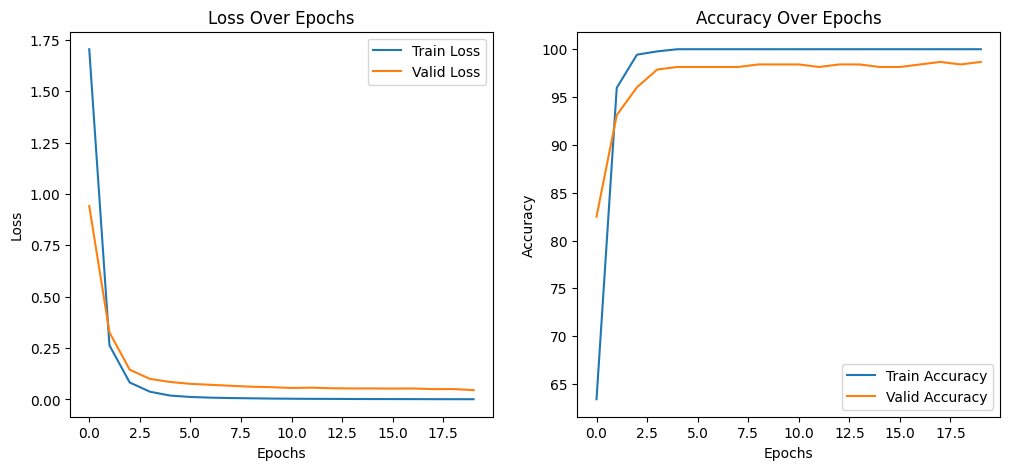

In [ ]:
# Step 7: Plot Loss and Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Valid Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(valid_accuracies, label='Valid Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# Load the saved model and switch to evaluation mode
resnet18.load_state_dict(torch.load("resnet18_finetuned_asl.pth"))
resnet18.eval()

# Ensure test dataset uses correct transforms
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

# Evaluate on the Test Set
correct_test, total_test = 0, 0
all_predictions, all_labels = [], []  # For debugging misclassifications

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = resnet18(images)
        _, predicted = torch.max(outputs, 1)

        # Track metrics
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

        # For debugging misclassifications
        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate test accuracy
test_accuracy = 100 * correct_test / total_test
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Debug misclassifications
from sklearn.metrics import classification_report
print(classification_report(all_labels, all_predictions, target_names=classes))


<ipython-input-18-29d3bd133800>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  resnet18.load_state_dict(torch.load("resnet18_finetuned_asl.pth"))


Test Accuracy: 99.21%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         9
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00        12
           7       1.00      1.00      1.00        11
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00        13
           a       1.00      1.00      1.00         8
           b       1.00      1.00      1.00         6
           c       1.00      1.00      1.00        13
           d       1.00      1.00      1.00        14
           e       1.00      1.00      1.00        10
           f       1.00      1.00      1.00        10
           g       1.00      1.00      1.00         8
     

# Test Fine-Tuned Model with test Images

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


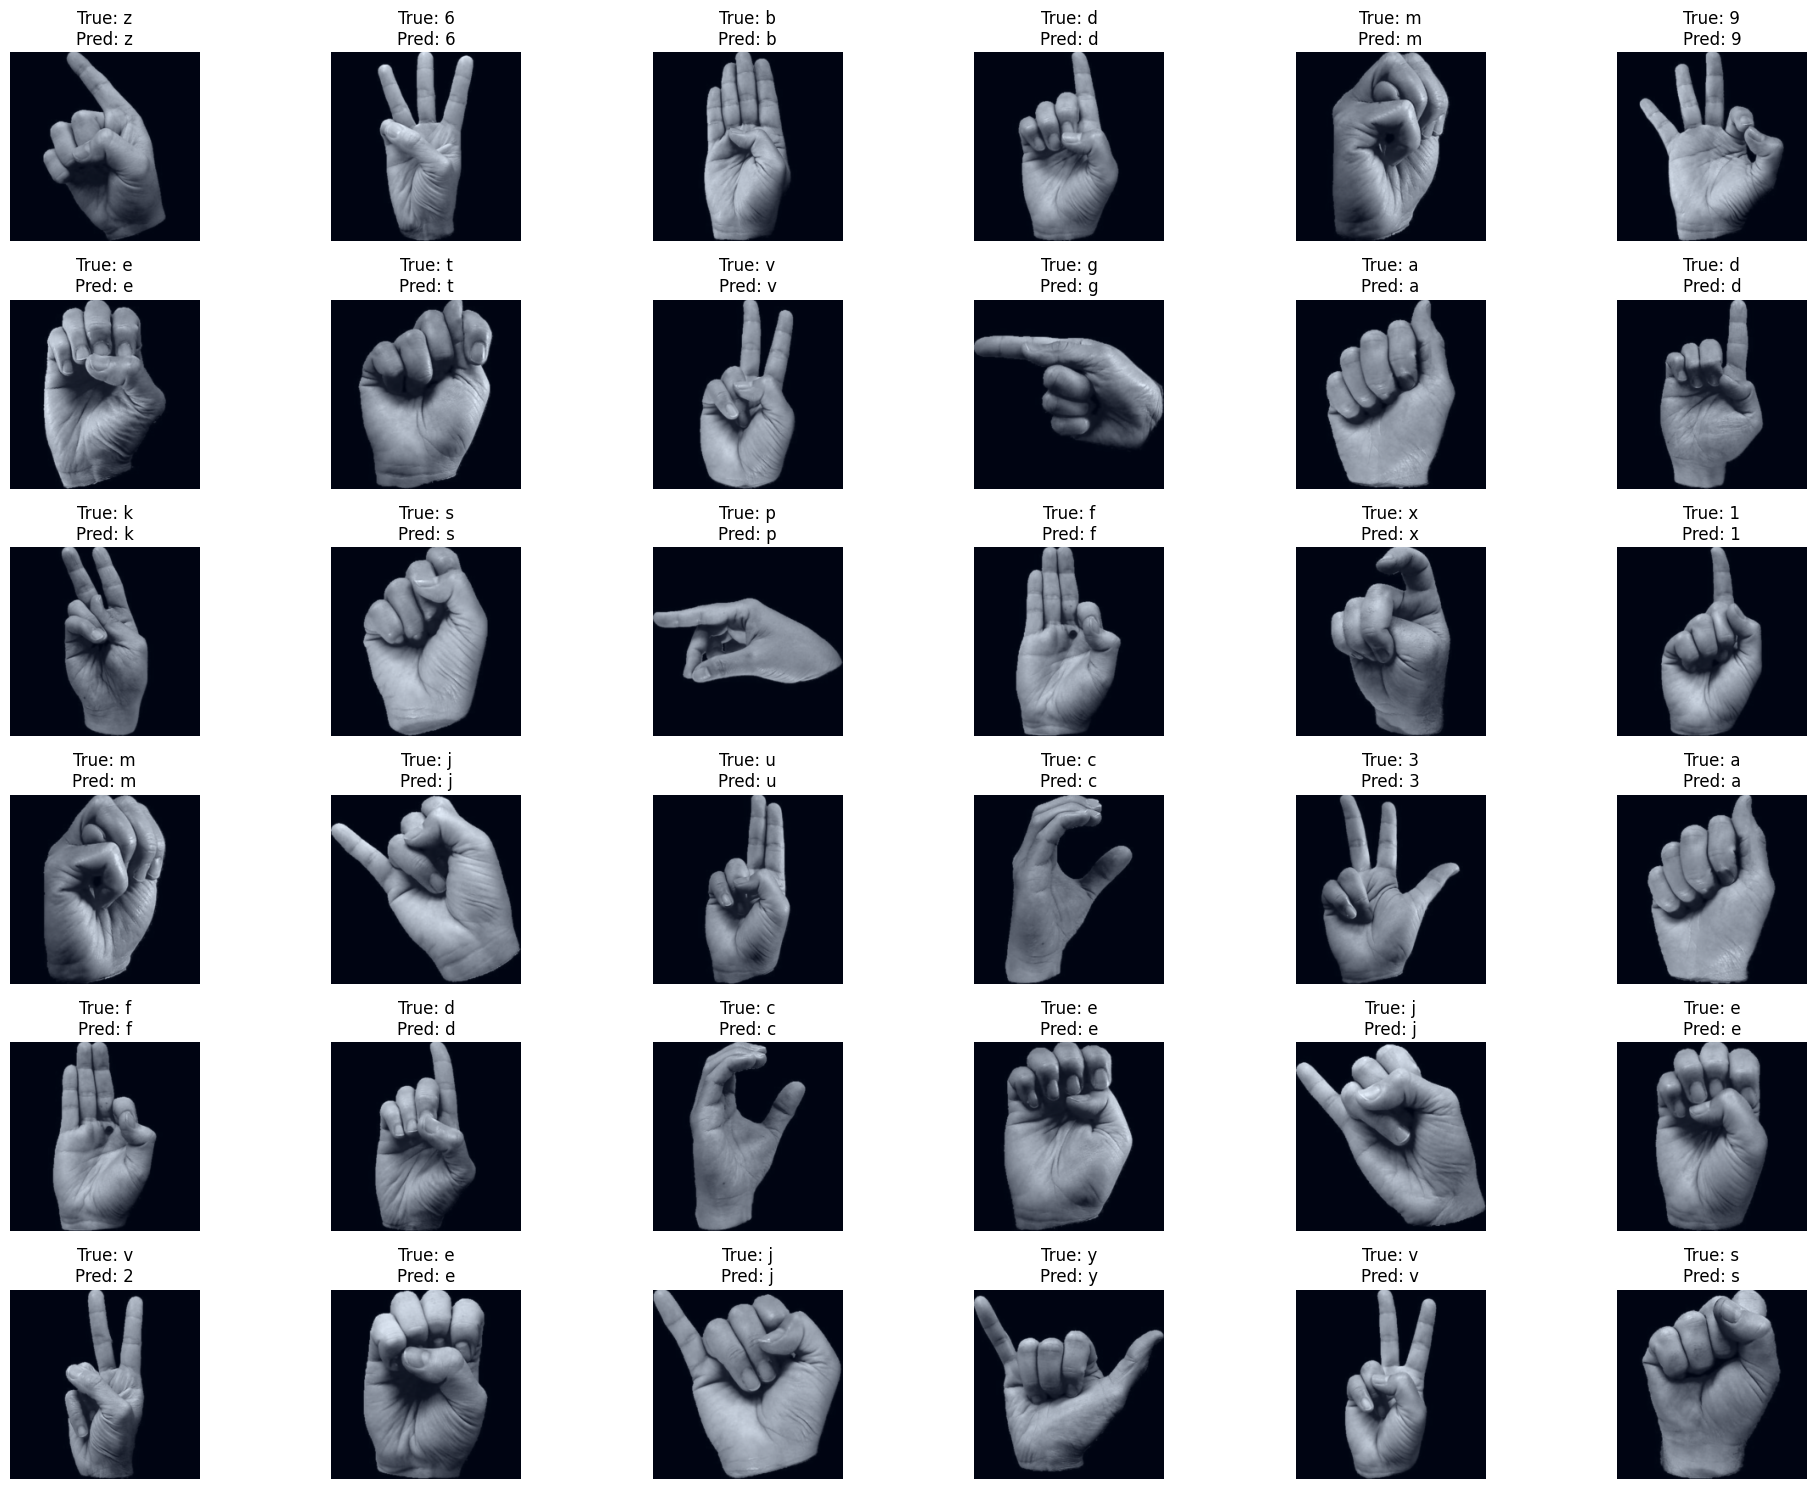

In [ ]:
import matplotlib.pyplot as plt
import torch
import math

# Function to visualize test images with predicted and actual labels
def visualize_test_predictions(model, test_loader, classes, device, num_images=36):
    """
    Visualizes test images with their actual and predicted labels.

    Args:
    - model (nn.Module): Trained PyTorch model.
    - test_loader (DataLoader): DataLoader containing the test dataset.
    - classes (list): List of class names corresponding to the labels.
    - device (torch.device): Device on which computations will be performed.
    - num_images (int): Number of test images to visualize.
    """
    model.eval()  # Set the model to evaluation mode
    images_shown = 0  # Counter for the number of images displayed

    # Determine grid dimensions dynamically
    grid_cols = 6
    grid_rows = math.ceil(num_images / grid_cols)

    fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(20, 15))
    axes = axes.flatten()  # Flatten the grid for easy indexing

    with torch.no_grad():  # Disable gradient computation for evaluation
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)  # Get predicted labels

            for i in range(images.size(0)):
                if images_shown >= num_images:
                    break  # Stop once the desired number of images is shown

                # Convert image tensor to numpy for display
                image_np = images[i].cpu().permute(1, 2, 0).numpy()  # Convert (C, H, W) to (H, W, C)
                image_np = (image_np * 0.229) + 0.485  # Unnormalize (mean/std adjustment for display)
                image_np = image_np.clip(0, 1)  # Clip to valid range

                # Display the image with predicted and actual labels
                ax = axes[images_shown]
                ax.imshow(image_np)
                ax.set_title(f"True: {classes[labels[i].item()]}\nPred: {classes[predicted[i].item()]}")
                ax.axis("off")

                images_shown += 1

            if images_shown >= num_images:
                break  # Exit the loop once the desired number of images is shown

    # Hide unused subplots
    for ax in axes[images_shown:]:
        ax.axis("off")

    plt.tight_layout()
    plt.show()

# Define classes explicitly for numbers and letters
classes = list(map(str, range(10))) + list("abcdefghijklmnopqrstuvwxyz")

# Visualize predictions (using ResNet or another model)
visualize_test_predictions(resnet18, test_loader, classes, device, num_images=36)


# Test fine-tuned Pre-trained MobileNetV2 model with hand gestures using a camera

Computer vision, integrating YOLOv8 for real-time video processing and PyTorch for prediction using the model

#save your trained model to your Google Drive

In [ ]:
# Define the save path for the ResNet model
model_save_path = "/content/resnet18_finetuned_asl.pth"

# Save the ResNet18 model's state dictionary
torch.save(resnet18.state_dict(), model_save_path)

# Confirm the model has been saved
print(f"Model saved to {model_save_path}")


Model saved to /content/resnet18_finetuned_asl.pth


# Download the Model Weights to Your Local Machine

In [ ]:
from google.colab import files
files.download("/content/resnet18_finetuned_asl.pth")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>